# 📊 **Exploratory Data Analysis (EDA) for Ironhack Payments Cohort Project**
### **Ironhack Data Science and Machine Learning Bootcamp**
📅 **Date:** December 12, 2024  
📅 **Submission Date:** December 13, 2024  
👩‍💻 **Author:** Ginosca Alejandro Dávila  

---

## **📌 Notebook Overview**

This notebook focuses on **exploratory data analysis (EDA)** using the cleaned datasets prepared in `1_data_cleaning_ironhack_payments.ipynb`.

🔁 _This EDA is part of a broader cohort analysis project commissioned by Ironhack Payments._  
📓 For full project scope, raw dataset context, and data cleaning steps, refer to Notebook 1.

---

The objective of this notebook is to uncover meaningful patterns, outliers, and time-based behaviors that will **inform the definition of cohorts and metrics** in the next phase of analysis.

Key areas covered in this notebook include:
- 📈 **User and cash request volumes** over time  
- 💰 **Cash amounts and fee distributions**  
- 🧍‍♀️ **User-level behavior**: number of requests per user  
- 📊 **Categorical breakdowns** of statuses, transfer types, and fee types  
- 📅 **Time-based patterns** for requests, reimbursements, and incidents  

---

## **📂 Input Data**

📁 `cleaned_project_datasets/`  
Contains the cleaned data exported from the `1_data_cleaning_ironhack_payments.ipynb` notebook:

- ✅ `cleaned_cash_requests.csv`  
- ✅ `cleaned_fees.csv`

Each file contains:
- Cleaned and validated rows  
- Standardized datetime formats  
- Normalized categorical values  
- Handled null entries  

---

## **💾 EDA Outputs Saved**

This notebook saves both visual and tabular outputs to support later cohort analysis:

📁 `eda_outputs/`  
├── 📂 `plots/` → All generated charts and visualizations (`.png`)  
├── 📂 `data/` → Key aggregates and tables used in cohort metric calculations (`.csv`)  

These outputs can be reused in the next notebook (`3_cohort_analysis_metrics.ipynb`) to avoid redundant computation.

---

## **🎯 Goals**

✔ Understand **distributions** and **frequencies** in cash requests and fees  
✔ Identify **seasonal or monthly trends** in request behavior  
✔ Explore **incident patterns** and their relationships to status and transfer types  
✔ Generate **insightful visualizations** to inform the cohort definition and metrics  

---

🔍 **Let’s begin our data exploration!**


---

## 📂 Step 1: Mount Google Drive

To begin, I need to mount Google Drive to access the cleaned datasets saved in the project directory:

📁 `My Drive > Colab Notebooks > Ironhack > Week 2 > Week 2 - Day 4 > project-1-ironhack-payments-2-en > cleaned_project_datasets`

This step ensures I can load the `clean_cash_requests.csv` and `clean_fees.csv` files into the notebook for analysis.


In [2]:
import sys
import os

# ✅ Safe print to avoid encoding issues
def safe_print(text):
    try:
        print(text)
    except UnicodeEncodeError:
        print(text.encode("ascii", errors="ignore").decode())

# ✅ Check for Colab environment
def is_colab():
    return 'google.colab' in sys.modules

# ✅ Set base path dynamically
if is_colab():
    from google.colab import drive
    drive.mount('/content/drive')

    # ✅ Try default path first
    default_path = 'MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en'
    full_default_path = os.path.join('/content/drive', default_path)

    if os.path.exists(full_default_path):
        project_base_path = full_default_path
        safe_print(f"✅ Colab project path set to: {project_base_path}")
    else:
        # Ask for user input if default fails
        safe_print("\n📂 Default path not found. Please input the relative path to your project inside Google Drive.")
        safe_print("👉 Example: 'MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en'")
        user_path = input("📥 Your path: ").strip()
        project_base_path = os.path.join('/content/drive', user_path)

        if not os.path.exists(project_base_path):
            raise FileNotFoundError(f"❌ Path does not exist: {project_base_path}\nPlease check your input.")

        safe_print(f"✅ Colab project path set to: {project_base_path}")
else:
    try:
        script_dir = os.path.dirname(os.path.abspath(__file__))
    except NameError:
        script_dir = os.getcwd()

    # ✅ Assume script is inside /scripts/ and go two levels up
    project_base_path = os.path.abspath(os.path.join(script_dir, '..', '..'))
    safe_print(f"✅ Local environment detected. Base path set to: {project_base_path}")


Mounted at /content/drive
✅ Colab project path set to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en


---

## 🧰 Step 2: Import Libraries and Load Cleaned Datasets

I’ll now import the libraries required for data manipulation and visualization.  
Then, I’ll load the cleaned datasets:

- `clean_cash_requests.csv`: contains information about each cash advance request
- `clean_fees.csv`: includes all fees related to those cash requests

Both datasets were exported from the previous notebook after cleaning.


In [3]:
# 📦 Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# 🧼 Aesthetic setup for plots
plt.style.use("ggplot")
sns.set_palette("pastel")

# 📁 Define paths to the cleaned datasets using project_base_path
cash_path = os.path.join(project_base_path, 'cleaned_project_datasets', 'clean_cash_requests.csv')
fees_path = os.path.join(project_base_path, 'cleaned_project_datasets', 'clean_fees.csv')

# 📥 Load the data with error handling
try:
    cash_df = pd.read_csv(cash_path, parse_dates=True)
    fees_df = pd.read_csv(fees_path, parse_dates=True)
    safe_print("✅ Cleaned datasets loaded successfully.")
    safe_print(f"cash_df shape: {cash_df.shape}")
    safe_print(f"fees_df shape: {fees_df.shape}")
except FileNotFoundError as e:
    safe_print(f"❌ File not found: {e}")
    sys.exit(1)  # Exit the script gracefully if file is missing

✅ Cleaned datasets loaded successfully.
cash_df shape: (23970, 17)
fees_df shape: (21057, 13)


---

## 🧾 Step 3: Dataset Preview & Structure Overview

Now that the datasets are loaded, let’s take a closer look at their structure.  
I’ll inspect:

- A quick preview of the **first and last few rows**  
- Dataset **shape** (rows × columns)  
- **Column names** and **data types**  
- A snapshot of **missing values**  
- General structure to confirm everything looks as expected

This step ensures I understand the content and format of the data before diving deeper.


In [4]:
# ✅ Define display fallback for script environments
try:
    display
except NameError:
    def display(x):
        safe_print(x.to_string() if isinstance(x, pd.DataFrame) else x)

# 📏 Configure Pandas to show full width and content
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)

# 🧾 First and last 5 rows of cash_df
safe_print("🔍 First 5 rows of cash_df:")
display(cash_df.head())

safe_print("🔍 Last 5 rows of cash_df:")
display(cash_df.tail())

# 📊 Data types and nulls for cash_df
safe_print("\n📊 Structure of cash_df:")
cash_df.info()

# 🔍 Missing values in cash_df
safe_print("\n🧼 Missing values in cash_df:")
display(cash_df.isnull().sum())


🔍 First 5 rows of cash_df:


,id,final_user_id,amount,status,transfer_type,reimbursement_date,created_at,updated_at,user_id,moderated_at,deleted_account_id,cash_request_received_date,money_back_date,send_at,recovery_status,reco_creation,reco_last_update
0,5,804.0,100.0,rejected,regular,2020-01-09 19:05:21.596363,2019-12-10 19:05:21.596873,2019-12-11 16:47:42.407830,804.0,2019-12-11 16:47:42.405646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70,231.0,100.0,rejected,regular,2020-01-09 19:50:12.347780,2019-12-10 19:50:12.347780,2019-12-11 14:24:22.900054,231.0,2019-12-11 14:24:22.897988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,191.0,100.0,rejected,regular,2020-01-09 19:13:35.825041,2019-12-10 19:13:35.825460,2019-12-11 09:46:59.779773,191.0,2019-12-11 09:46:59.777728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,761.0,99.0,rejected,regular,2020-01-09 19:16:10.879606,2019-12-10 19:16:10.880172,2019-12-18 14:26:18.136163,761.0,2019-12-18 14:26:18.128407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1594,7686.0,100.0,rejected,regular,NaN,2020-05-06 09:59:38.877376,2020-05-07 09:21:55.340080,7686.0,2020-05-07 09:21:55.320193,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🔍 Last 5 rows of cash_df:


,id,final_user_id,amount,status,transfer_type,reimbursement_date,created_at,updated_at,user_id,moderated_at,deleted_account_id,cash_request_received_date,money_back_date,send_at,recovery_status,reco_creation,reco_last_update
23965,20616,13681.0,100.0,money_back,instant,NaN,2020-10-12 13:54:11.686225,2021-02-06 20:17:49.292493,13681.0,NaN,NaN,2020-10-13,2021-02-06 20:17:49.257521,2020-10-12 13:54:24.352856,NaN,NaN,NaN
23966,25243,30367.0,50.0,money_back,instant,NaN,2020-10-27 14:41:25.734910,2020-12-18 13:15:40.843946,NaN,NaN,30367.0,2020-10-28,2020-12-01 13:26:53.787672,2020-10-27 14:41:57.901946,completed,2020-11-12 23:20:41.928788,2020-12-01 13:26:53.815504
23967,22357,82122.0,100.0,money_back,instant,NaN,2020-10-20 07:58:04.006937,2021-02-05 12:19:30.656816,82122.0,NaN,NaN,2020-10-21,2021-02-05 12:19:30.626289,2020-10-20 07:58:14.171553,NaN,NaN,NaN
23968,20256,64517.0,100.0,money_back,instant,NaN,2020-10-10 05:40:55.700422,2021-02-05 13:14:19.707627,64517.0,NaN,NaN,2020-10-12,2021-02-05 13:14:19.689906,2020-10-10 05:41:23.368363,NaN,NaN,NaN
23969,19886,44867.0,100.0,direct_debit_sent,instant,NaN,2020-10-08 14:16:52.155661,2021-01-05 15:45:52.645536,44867.0,NaN,NaN,2020-10-10,NaN,2020-10-08 14:17:04.526139,NaN,NaN,NaN



📊 Structure of cash_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   final_user_id               23970 non-null  float64
 2   amount                      23970 non-null  float64
 3   status                      23970 non-null  object 
 4   transfer_type               23970 non-null  object 
 5   reimbursement_date          3050 non-null   object 
 6   created_at                  23970 non-null  object 
 7   updated_at                  23970 non-null  object 
 8   user_id                     21867 non-null  float64
 9   moderated_at                15912 non-null  object 
 10  deleted_account_id          2103 non-null   float64
 11  cash_request_received_date  16289 non-null  object 
 12  money_back_date             12040 non-null  object 
 13  send_a

,0
id,0
final_user_id,0
amount,0
status,0
transfer_type,0
reimbursement_date,20920
created_at,0
updated_at,0
user_id,2103
moderated_at,8058


In [5]:
# 🧾 First and last 5 rows of fees_df
safe_print("🔍 First 5 rows of fees_df:")
display(fees_df.head())

safe_print("🔍 Last 5 rows of fees_df:")
display(fees_df.tail())

# 📊 Data types and nulls for fees_df
safe_print("\n📊 Structure of fees_df:")
fees_df.info()

# 🔍 Missing values in fees_df
safe_print("\n🧼 Missing values in fees_df:")
display(fees_df.isnull().sum())


🔍 First 5 rows of fees_df:


,id,cash_request_id,total_amount,type,status,created_at,category,reason,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,5.0,instant_payment,rejected,2020-09-07 10:47:27.423150,NaN,Instant Payment Cash Request 14941,2020-10-13 14:25:09.396112,2020-12-17 14:50:07.470110,NaN,NaN,after
1,6961,11714.0,5.0,incident,accepted,2020-09-09 20:51:17.998653,rejected_direct_debit,rejected direct debit,2020-10-13 14:25:15.537063,2020-12-08 17:13:10.459080,NaN,NaN,after
2,16296,23371.0,5.0,instant_payment,accepted,2020-10-23 10:10:58.352972,NaN,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352994,2020-11-04 19:34:37.432910,NaN,NaN,after
3,20775,26772.0,5.0,instant_payment,accepted,2020-10-31 15:46:53.643958,NaN,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643982,2020-11-19 05:09:22.500223,NaN,NaN,after
4,11242,19350.0,5.0,instant_payment,accepted,2020-10-06 08:20:17.170432,NaN,Instant Payment Cash Request 19350,2020-10-13 14:25:03.267983,2020-11-02 14:45:20.355598,NaN,NaN,after


🔍 Last 5 rows of fees_df:


,id,cash_request_id,total_amount,type,status,created_at,category,reason,updated_at,paid_at,from_date,to_date,charge_moment
21052,12372,20262.0,5.0,instant_payment,rejected,2020-10-10 06:42:22.822743,NaN,Instant Payment Cash Request 20262,2020-10-13 14:25:04.180490,2020-11-17 05:14:00.080854,NaN,NaN,after
21053,20768,26764.0,5.0,instant_payment,rejected,2020-10-31 15:24:18.680694,NaN,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680715,2020-12-16 07:10:54.697639,NaN,NaN,after
21054,18779,25331.0,5.0,instant_payment,rejected,2020-10-27 17:28:51.749177,NaN,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749200,2020-11-18 04:35:42.915511,NaN,NaN,after
21055,16542,23628.0,5.0,instant_payment,rejected,2020-10-23 16:27:52.047457,NaN,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047486,2020-12-18 05:18:01.465317,NaN,NaN,after
21056,13301,20982.0,5.0,instant_payment,accepted,2020-10-14 07:12:43.958192,NaN,Instant Payment Cash Request 20982,2020-10-14 07:12:43.958219,2021-02-12 13:02:46.950220,NaN,NaN,after



📊 Structure of fees_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21057 entries, 0 to 21056
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21057 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   total_amount     21057 non-null  float64
 3   type             21057 non-null  object 
 4   status           21057 non-null  object 
 5   created_at       21057 non-null  object 
 6   category         2196 non-null   object 
 7   reason           21057 non-null  object 
 8   updated_at       21057 non-null  object 
 9   paid_at          15438 non-null  object 
 10  from_date        6749 non-null   object 
 11  to_date          6512 non-null   object 
 12  charge_moment    21057 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB

🧼 Missing values in fees_df:


,0
id,0
cash_request_id,0
total_amount,0
type,0
status,0
created_at,0
category,18861
reason,0
updated_at,0
paid_at,5619


---

## ✅ Initial Data Structure Summary

At this point, I’ve successfully loaded and inspected the cleaned datasets. Here's a quick summary:

- **`cash_df`** contains **23,970 rows × 17 columns**, covering individual cash request records.  
- **`fees_df`** contains **21,057 rows × 13 columns**, capturing detailed fee information tied to each cash request.

I confirmed:
- ✅ Column names, shapes, and types match expectations  
- ✅ No issues in loading data  
- ⚠️ Several fields contain missing values — expected due to business logic (e.g., reimbursement-related dates and incident info)  
- ✅ Data types are consistent with what I need for further analysis

With this context established, I can now move into **descriptive statistics and visual exploration**.

---


## 📊 Step 4: Descriptive Statistics and Categorical Breakdown

In this step, I explore the distribution of key numerical and categorical variables in both datasets.

This includes:

- Summary statistics for monetary values (`amount` and `total_amount`)
- Frequency of key categorical variables (`status`, `type`, `transfer_type`, `category`, etc.)
- Basic visualizations to identify potential imbalances, trends, or dominant values that might shape our cohort logic later

---

### 🔢 Numeric Overview


In [6]:
# Summary stats for numerical columns
safe_print("🔢 Summary statistics for `cash_df['amount']`")
display(cash_df['amount'].describe())

safe_print("\n🔢 Summary statistics for `fees_df['total_amount']`")
display(fees_df['total_amount'].describe())


🔢 Summary statistics for `cash_df['amount']`


,amount
count,23970.000000
mean,82.720818
std,26.528065
min,1.000000
25%,50.000000
50%,100.000000
75%,100.000000
max,200.000000



🔢 Summary statistics for `fees_df['total_amount']`


,total_amount
count,21057.000000
mean,5.000237
std,0.034457
min,5.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,10.000000


### 🔍 Interpretation of Summary Statistics

- **Cash Request Amounts (`cash_df['amount']`)**:
  - Most values cluster around **100**, which is also the **median** and **75th percentile**.
  - The minimum value is **1**, and the maximum is **200**, indicating a relatively narrow range.
  - The low **standard deviation (~26.5)** suggests limited variability among requests.

- **Fee Amounts (`fees_df['total_amount']`)**:
  - The majority of fees are fixed at **5.00**, with only a small number of **10.00** values.
  - The extremely low standard deviation (**~0.03**) confirms that fee values are nearly constant.
  - This aligns with Ironhack Payments’ flat-fee model as described in the project context.

➡️ This stability will help simplify later cohort-based revenue analysis, as fee amounts are predictable and bounded.


---

### 🔤 Categorical Distributions

I'll now inspect and visualize the distribution of categorical variables in both datasets using bar charts and value counts.

🧭 **Note:** All generated plots will be saved to: `eda_outputs/plots`



🧭 Plot outputs will be saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/eda_outputs/plots
📊 Value counts for cash_df['status']:



,count
status,
money_back,16397
rejected,6568
direct_debit_rejected,831
active,59
transaction_declined,48
direct_debit_sent,34
canceled,33


✅ Saved: 01_distribution_cash_status.png


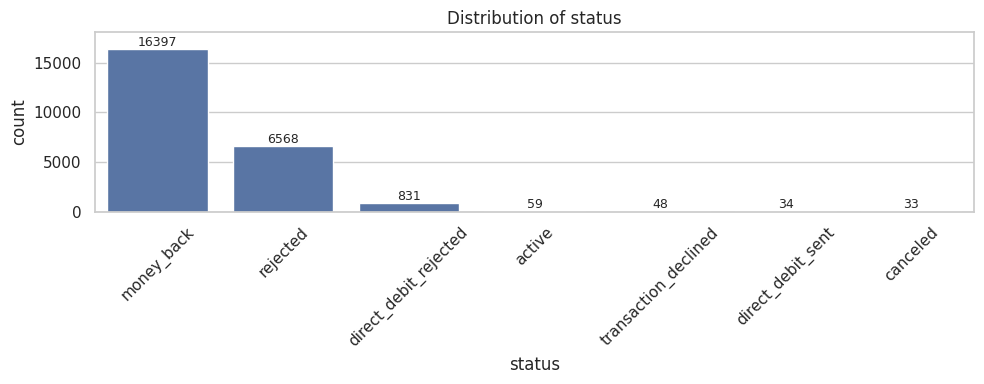

📊 Value counts for cash_df['transfer_type']:



,count
transfer_type,
instant,13882
regular,10088


✅ Saved: 02_distribution_cash_transfer_type.png


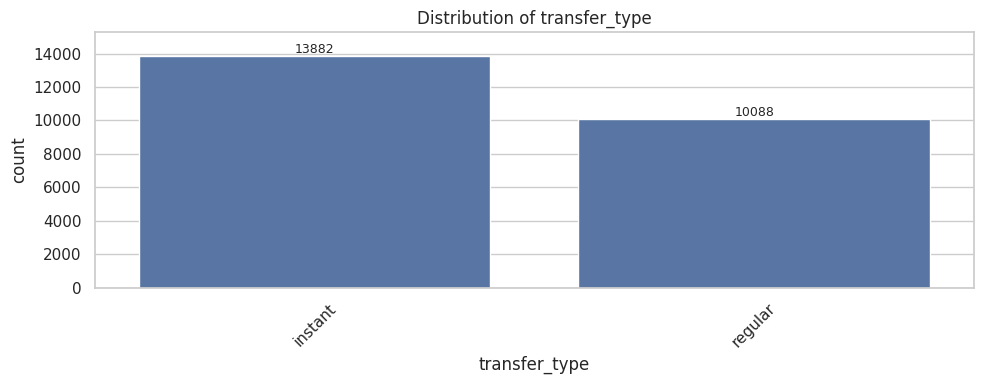

📊 Value counts for cash_df['recovery_status']:



,count
recovery_status,
missing,20640
completed,2468
pending,845
pending_direct_debit,16
cancelled,1


✅ Saved: 03_distribution_cash_recovery_status.png


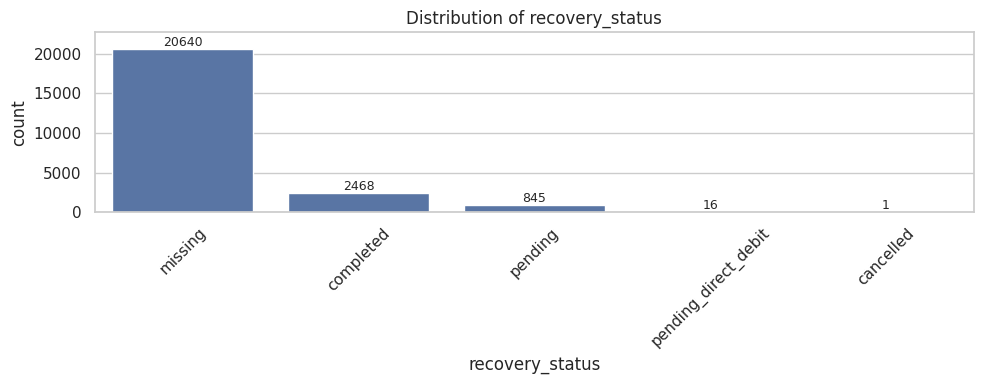

📊 Value counts for fees_df['type']:



,count
type,
instant_payment,11095
postpone,7766
incident,2196


✅ Saved: 04_distribution_fees_type.png


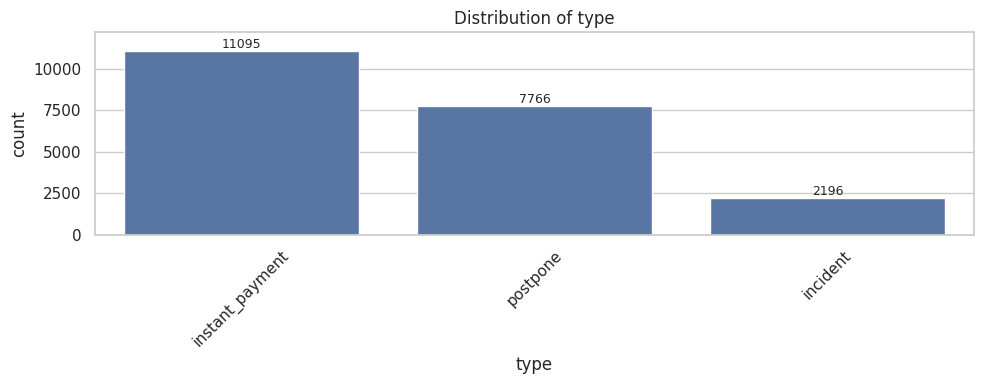

📊 Value counts for fees_df['status']:



,count
status,
accepted,14841
cancelled,4934
rejected,1194
confirmed,88


✅ Saved: 05_distribution_fees_status.png


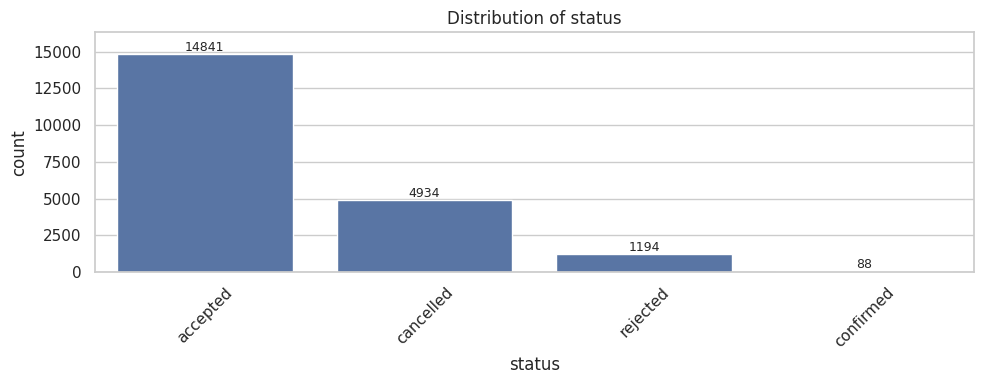

📊 Value counts for fees_df['category']:



,count
category,
missing,18861
rejected_direct_debit,1599
month_delay_on_payment,597


✅ Saved: 06_distribution_fees_category.png


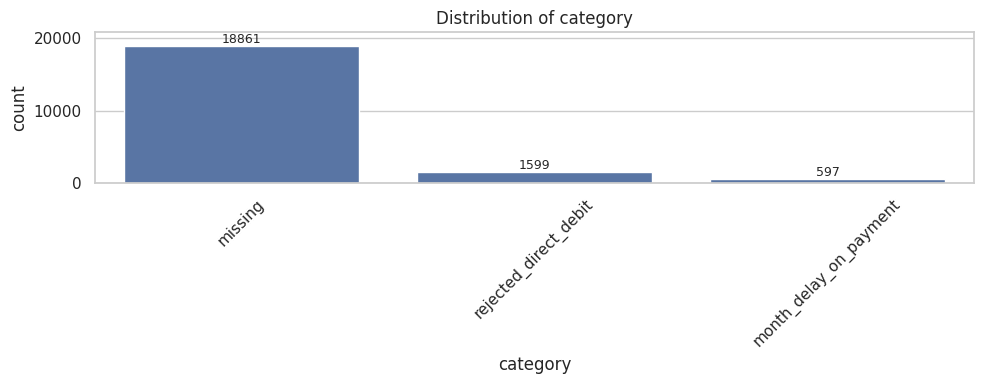

📊 Value counts for fees_df['charge_moment']:



,count
charge_moment,
after,16720
before,4337


✅ Saved: 07_distribution_fees_charge_moment.png


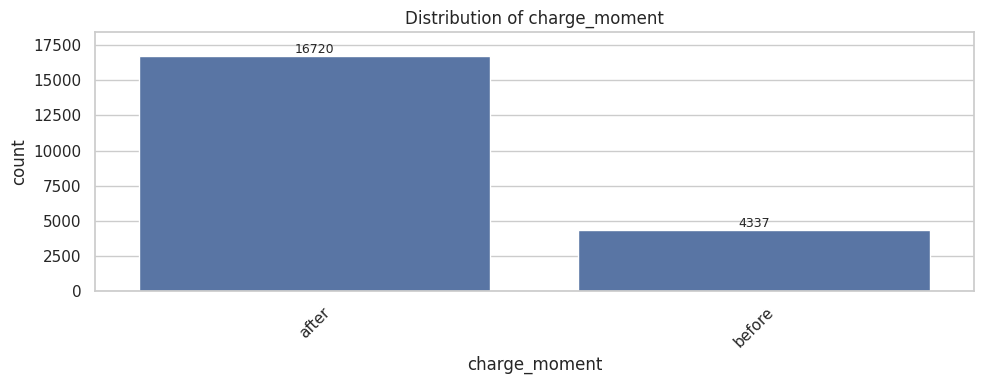

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 📊 Set seaborn plot style
sns.set(style="whitegrid")

# ✅ Config toggles
SAVE_PLOTS = True
OVERWRITE_PLOTS = True
plot_index = 1

# 📁 Ensure plot directory exists
eda_plot_path = os.path.join(project_base_path, 'eda_outputs', 'plots')
os.makedirs(eda_plot_path, exist_ok=True)

# 🧭 Quick tip: confirm save location
safe_print(f"🧭 Plot outputs will be saved to: {eda_plot_path}")

# 🔠 Helper to annotate barplot counts
def annotate_counts(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9)

# 🗂️ Categorical variables to analyze
categorical_cash = ['status', 'transfer_type', 'recovery_status']
categorical_fees = ['type', 'status', 'category', 'charge_moment']

# 🧼 Columns to replace NaN with 'missing'
replace_nan_cash = ['recovery_status']
replace_nan_fees = ['category']

# 📊 Plot cash_df categorical variables
for col in categorical_cash:
    safe_print(f"📊 Value counts for cash_df['{col}']:\n")
    temp_col = cash_df[col].fillna("missing") if col in replace_nan_cash else cash_df[col]
    counts = temp_col.value_counts(dropna=False)
    display(counts)

    plt.figure(figsize=(10, 4))
    ax = sns.countplot(x=temp_col, order=counts.index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.ylim(0, counts.max() * 1.1)
    annotate_counts(ax)
    plt.tight_layout()

    if SAVE_PLOTS:
        filename = f"{plot_index:02d}_distribution_cash_{col}.png"
        filepath = os.path.join(eda_plot_path, filename)
        if OVERWRITE_PLOTS or not os.path.exists(filepath):
            plt.savefig(filepath)
            safe_print(f"✅ Saved: {filename}")
        else:
            safe_print(f"⚠️ Skipped (already exists): {filename}")
    plot_index += 1
    plt.show()

# 📊 Plot fees_df categorical variables
for col in categorical_fees:
    safe_print(f"📊 Value counts for fees_df['{col}']:\n")
    temp_col = fees_df[col].fillna("missing") if col in replace_nan_fees else fees_df[col]
    counts = temp_col.value_counts(dropna=False)
    display(counts)

    plt.figure(figsize=(10, 4))
    ax = sns.countplot(x=temp_col, order=counts.index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.ylim(0, counts.max() * 1.1)
    annotate_counts(ax)
    plt.tight_layout()

    if SAVE_PLOTS:
        filename = f"{plot_index:02d}_distribution_fees_{col}.png"
        filepath = os.path.join(eda_plot_path, filename)
        if OVERWRITE_PLOTS or not os.path.exists(filepath):
            plt.savefig(filepath)
            safe_print(f"✅ Saved: {filename}")
        else:
            safe_print(f"⚠️ Skipped (already exists): {filename}")
    plot_index += 1
    plt.show()

### 📊 Categorical Distributions – Insights

#### 🗃️ `cash_df`:
- **`status`**:
  - Most requests are either `money_back` (✅ reimbursed) or `rejected`.
  - Smaller counts for statuses like `direct_debit_rejected` and `active` reflect edge cases or incomplete flows.

- **`transfer_type`**:
  - About **58%** of requests were `instant`, while **42%** were `regular`.
  - Indicates a strong user preference for faster, paid transfers — directly tied to fee generation.

- **`recovery_status`**:
  - ~86% are labeled as `missing`, meaning **no payment incident** occurred.
  - Most incidents were `completed`, though a small number remain `pending` or `pending_direct_debit`.

#### 💸 `fees_df`:
- **`type`**:
  - `instant_payment` fees dominate — aligns with frequent user demand for instant cash.
  - `postpone` fees also common; `incident` fees are fewer but still notable.

- **`status`**:
  - Most fees are `accepted` or `cancelled`; relatively few are `rejected` or remain `confirmed`.

- **`category`**:
  - High number of missing values is expected — only `incident` fees use this field.
  - Among incident fees, most were due to `rejected_direct_debit`.

- **`charge_moment`**:
  - Majority of fees are charged **after** the cash request (at reimbursement).
  - A smaller portion are charged **before** (e.g., instant or postpone fees at creation).

➡️ These patterns confirm that **instant transfers and postponements** are major fee drivers — supporting their importance in the upcoming cohort revenue analysis.


---
## 📊 Step 5: Monthly Cash Request Volume and Amount

To better understand platform activity and financial growth in one view, I analyze:

- The **number of cash requests** made each month
- The **total cash amount requested** during the same period

These metrics are based on the `created_at` column, which records the **timestamp when each cash request was created**.

### 📆 Supporting Fields Created:

To facilitate aggregation and improve chart labeling, two string-based columns were derived from `created_at`:

- 🧮 `year_month`: A **machine-friendly** value in `YYYY-MM` format (e.g., `2020-07`)  
  → Used to group, sort, and aggregate cash requests over time

- 🗓️ `month_label`: A **human-readable** label in `Month Year` format (e.g., `Jul 2020`)  
  → Used to clearly label x-axes and summary tables

These fields are **not datetime types**, but they reflect the same underlying cash request timestamp in more practical formats for analysis and visualization.

> 💬 **Note**: The currency unit is not explicitly stated in the dataset. However, since Ironhack Payments uses **SEPA direct debits**, I assume the unit is **euros (€)**.

---


📊 Monthly Cash Requests and Amount Requested:


,year_month,month_label,cash_requests,amount
0,2019-11,Nov 2019*,1,€1
1,2019-12,Dec 2019,289,"€27,297"
2,2020-01,Jan 2020,223,"€21,587"
3,2020-02,Feb 2020,184,"€16,653"
4,2020-03,Mar 2020,244,"€23,549"
5,2020-04,Apr 2020,473,"€46,093"
6,2020-05,May 2020,837,"€79,236"
7,2020-06,Jun 2020,2615,"€246,026"
8,2020-07,Jul 2020,3601,"€328,187"
9,2020-08,Aug 2020,3417,"€287,633"



(*) Partial months: Nov 2019 starts on 19th, Nov 2020 ends on 1st.


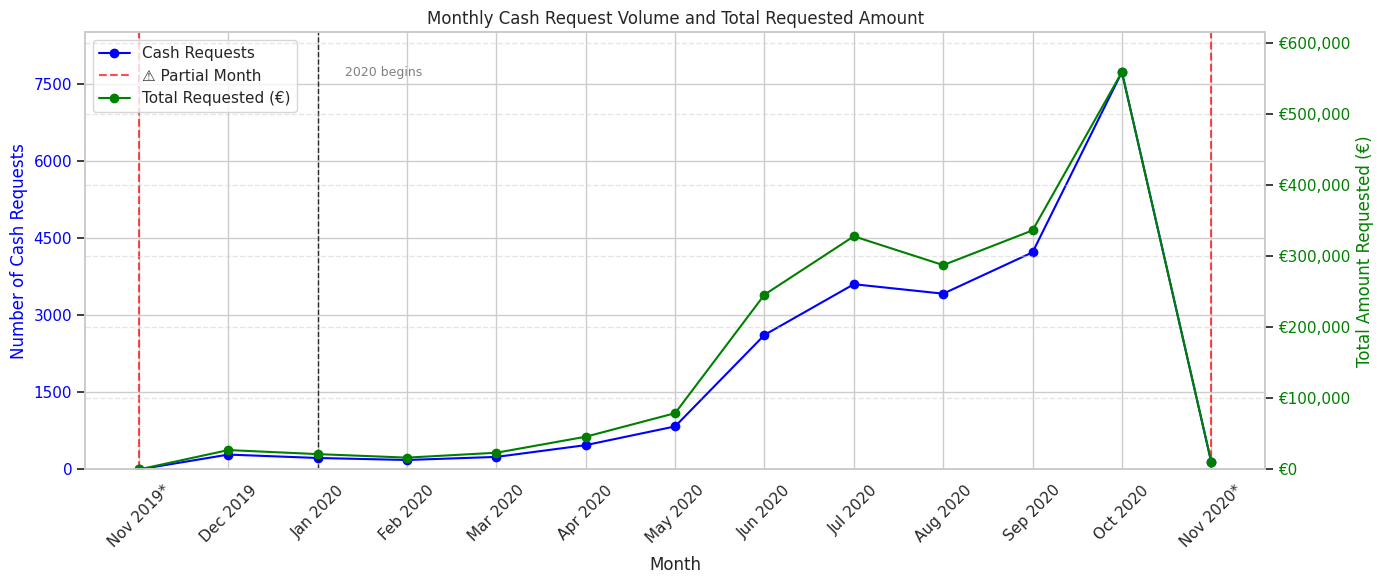

✅ Saved: 08_monthly_cash_requests_dual_axis.png


In [8]:
# --- 📊 Merged Chart: Cash Requests Volume and Amount Over Time ---

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# 1. Ensure datetime is parsed
cash_df['created_at'] = pd.to_datetime(cash_df['created_at'], errors='coerce')
cash_df['year_month'] = cash_df['created_at'].dt.to_period('M')
cash_df['month_label'] = cash_df['created_at'].dt.strftime('%b %Y')

# 2. Group and merge volume + amount
monthly_requests = (
    cash_df.groupby(['year_month', 'month_label'])
    .size()
    .reset_index(name='cash_requests')
)

monthly_amount = (
    cash_df.groupby(['year_month', 'month_label'])['amount']
    .sum()
    .reset_index()
)

monthly_summary = pd.merge(monthly_requests, monthly_amount, on=['year_month', 'month_label'])
monthly_summary = monthly_summary.sort_values(by='year_month')

# 3. Mark partial months
monthly_summary['month_label'] = monthly_summary['month_label'].replace({
    'Nov 2019': 'Nov 2019*',
    'Nov 2020': 'Nov 2020*'
})

# 4. Format amount column with € symbol for table
formatted_table = monthly_summary.copy()
formatted_table['amount'] = formatted_table['amount'].apply(lambda x: f"€{x:,.0f}")
safe_print("📊 Monthly Cash Requests and Amount Requested:")
display(formatted_table[['year_month', 'month_label', 'cash_requests', 'amount']])
safe_print("\n(*) Partial months: Nov 2019 starts on 19th, Nov 2020 ends on 1st.")

# 5. Plot dual-axis chart
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left Y-axis: Number of Requests
line1, = ax1.plot(
    monthly_summary['month_label'],
    monthly_summary['cash_requests'],
    marker='o',
    color='blue',
    label='Cash Requests'
)
ax1.set_ylabel('Number of Cash Requests', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Month')
ax1.set_ylim(0, monthly_summary['cash_requests'].max() * 1.1)
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True, nbins=6))

# Right Y-axis: Total Amount (€)
ax2 = ax1.twinx()
line2, = ax2.plot(
    monthly_summary['month_label'],
    monthly_summary['amount'],
    marker='o',
    color='green',
    label='Total Requested (€)'
)
ax2.set_ylabel('Total Amount Requested (€)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Smooth right axis ticks
ax2.set_ylim(0, monthly_summary['amount'].max() * 1.1)
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('€{x:,.0f}'))

# Red dashed lines for partial months
partial_months = ['Nov 2019*', 'Nov 2020*']
for i, pm in enumerate(partial_months):
    idx = monthly_summary[monthly_summary['month_label'] == pm].index
    if not idx.empty:
        ax1.axvline(
            x=idx[0],
            color='red',
            linestyle='--',
            linewidth=1.5,
            alpha=0.7,
            label='⚠️ Partial Month' if i == 0 else None
        )

# Dashed line for Jan 2020
jan_idx = monthly_summary[monthly_summary['month_label'] == 'Jan 2020'].index
if not jan_idx.empty:
    ax1.axvline(
        x=jan_idx[0],
        color='black',
        linestyle='--',
        linewidth=1,
        alpha=0.8
    )
    ax1.text(jan_idx[0]+0.3, ax1.get_ylim()[1]*0.9, '2020 begins', fontsize=9, color='gray')

# Title and layout
plt.title('Monthly Cash Request Volume and Total Requested Amount')
ax1.set_xticks(range(len(monthly_summary)))
ax1.set_xticklabels(monthly_summary['month_label'], rotation=45)
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.5)
fig.tight_layout()

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

# 💾 Save the figure
if SAVE_PLOTS:
    filename = f"{plot_index:02d}_monthly_cash_requests_dual_axis.png"
    filepath = os.path.join(eda_plot_path, filename)
    if OVERWRITE_PLOTS or not os.path.exists(filepath):
        fig.savefig(filepath)
        safe_print(f"✅ Saved: {filename}")
    else:
        safe_print(f"⚠️ Skipped (already exists): {filename}")
plot_index += 1


### 📈 Interpretation: Monthly Cash Request Volume and Total Amount

The chart and table above show strong alignment between **user activity** and **monetary demand**, now displayed with both `year_month` (sortable format) and `month_label` (human-readable format).

- In **late 2019 and early 2020**, both request volume and total requested amounts were relatively low.
- A clear growth trend starts around **May 2020**, accelerating into a peak in **October 2020**:
  - October had **7,725 cash requests** totaling more than **€550,000**.
- Sharp drops in **November 2019** and **November 2020** are due to **partial data**:
  - November 2019 includes requests from the 19th onward.
  - November 2020 includes only requests up to the 1st.

➡️ This trend confirms rising adoption and engagement with the platform and provides a strong foundation for defining **user cohorts by first request month** in the next steps.


---
## 🧍 Step 6: User-Level Behavior

In this step, I explore how individual users interact with the platform over time.

I’ll analyze:
- The **number of cash requests per user**
- The **distribution of user activity** (single-use vs. repeat users)
- Summary stats to identify potential **super-users** or outliers

Understanding user behavior helps us better define **cohort engagement** and evaluate long-term value per user.

---


📊 Request count summary per user:


,request_count
count,11793.000000
mean,2.032562
std,1.850352
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,21.000000


🧍‍♂️ Single-use users: 7,138 (60.53%)
🧍‍♀️ Multi-use users: 4,655 (39.47%)
📌 Total unique users: 11,793

📋 Frequency Table: Number of Users per Request Count


,request_count,user_count,request_count_str
0,1,7138,1
1,2,1848,2
2,3,1006,3
3,4,702,4
4,5,455,5
5,6,233,6
6,7,153,7
7,8,86,8
8,9,66,9
9,10,31,10


✅ Saved: 09_user_request_frequency.png


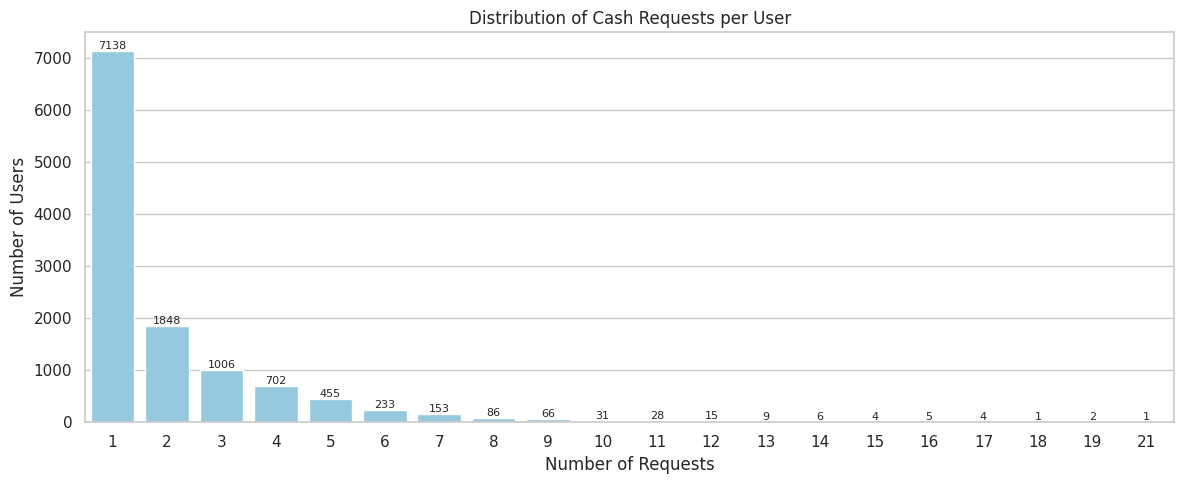

In [9]:
# --- 👤 User-Level Behavior – Cash Request Frequency ---

# 1. Count number of requests per user
user_request_counts = cash_df['final_user_id'].value_counts().reset_index()
user_request_counts.columns = ['final_user_id', 'request_count']

# 2. Show summary stats
safe_print("📊 Request count summary per user:")
display(user_request_counts['request_count'].describe())

# 3. Calculate single vs. multi-use users
single_use = (user_request_counts['request_count'] == 1).sum()
multi_use = (user_request_counts['request_count'] > 1).sum()
total_users = user_request_counts.shape[0]

safe_print(f"🧍‍♂️ Single-use users: {single_use:,} ({single_use / total_users:.2%})")
safe_print(f"🧍‍♀️ Multi-use users: {multi_use:,} ({multi_use / total_users:.2%})")
safe_print(f"📌 Total unique users: {total_users:,}")

# 4. Prepare frequency table for plotting
request_freq = user_request_counts['request_count'].value_counts().sort_index()
request_freq_df = request_freq.reset_index()
request_freq_df.columns = ['request_count', 'user_count']
request_freq_df['request_count_str'] = request_freq_df['request_count'].astype(str)  # Convert to string for categorical axis

# 5. Display table
safe_print("\n📋 Frequency Table: Number of Users per Request Count")
display(request_freq_df)

# 6. Plot with x-ticks as categories (strings) to ensure all are shown
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=request_freq_df, x='request_count_str', y='user_count', color='skyblue')

plt.title("Distribution of Cash Requests per User")
plt.xlabel("Number of Requests")
plt.ylabel("Number of Users")
plt.grid(True, axis='y')

# 7. Annotate bar tops
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (bar.get_x() + bar.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()

# 8. Save plot if enabled
if SAVE_PLOTS:
    filename = f"{plot_index:02d}_user_request_frequency.png"
    filepath = os.path.join(eda_plot_path, filename)
    if OVERWRITE_PLOTS or not os.path.exists(filepath):
        plt.savefig(filepath)
        safe_print(f"✅ Saved: {filename}")
        plot_index += 1
    else:
        safe_print(f"⚠️ Skipped (already exists): {filename}")
else:
    plot_index += 1

plt.show()


### 📊 Interpretation: Cash Requests per User

The distribution of cash requests per user reveals important insights into platform engagement:

- **Single-use behavior dominates**:  
  A significant majority of users (📍 **60.53%**, or **7,138 users**) made **only one** cash request.
  
- **Multi-use segment**:  
  The remaining **39.47%** (or **4,655 users**) made **multiple requests**, with a sharp decline as the number of requests increases.

- **Request frequency tapers quickly**:  
  Most multi-use users fall into the 2–5 request range. Very few users exceeded **10+ requests**, indicating rare heavy usage.

This pattern suggests the platform may primarily serve **one-time or occasional needs**, with a smaller core of more engaged users. This insight could be valuable when **segmenting cohorts** or **targeting retention strategies**.


---
## ⚠️ Step 7: Incident and Recovery Patterns – Status Overview

This section explores the **frequency and nature of payment incidents** recorded in the `cash_df` dataset via the `recovery_status` column.

I aim to:
- Identify how often incidents occur
- Understand how they are resolved (e.g., completed, pending)
- Detect patterns that may inform **risk analysis** and **cohort segmentation**

---


📊 Recovery Status Counts:


,count
recovery_status_clean,
missing,20640
completed,2468
pending,845
pending_direct_debit,16
cancelled,1



📈 Recovery Status Percentage:


,proportion
recovery_status_clean,
missing,86.11
completed,10.30
pending,3.53
pending_direct_debit,0.07
cancelled,0.00


✅ Saved: 10_recovery_status_distribution.png


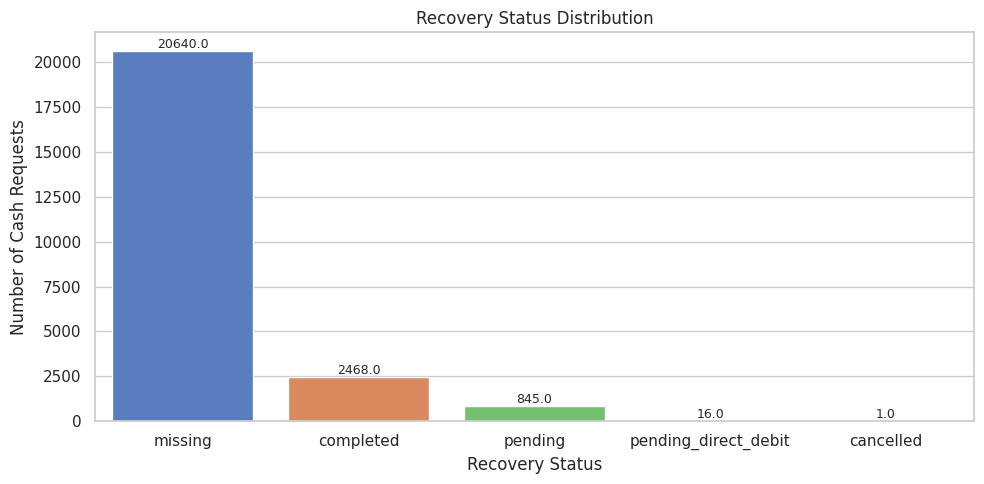

In [10]:
# --- ⚠️ Distribution of recovery_status in cash_df ---

# 1. Replace NaN with "missing" for visualization
cash_df['recovery_status_clean'] = cash_df['recovery_status'].fillna("missing")

# 2. Calculate value counts and percentages
recovery_counts = cash_df['recovery_status_clean'].value_counts()
recovery_percent = recovery_counts / len(cash_df) * 100

# 3. Display tables
safe_print("📊 Recovery Status Counts:")
display(recovery_counts.to_frame(name='count'))

safe_print("\n📈 Recovery Status Percentage:")
display(recovery_percent.round(2).to_frame(name='proportion'))

# 4. Plot the distribution without triggering future warning
plt.figure(figsize=(10, 5))
ax = sns.countplot(
    data=cash_df,
    x='recovery_status_clean',
    hue='recovery_status_clean',
    order=recovery_counts.index,
    palette='muted',
    legend=False
)
plt.title("Recovery Status Distribution")
plt.xlabel("Recovery Status")
plt.ylabel("Number of Cash Requests")

# Annotate bar tops
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}', (bar.get_x() + bar.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()

# 5. Save plot if enabled
if SAVE_PLOTS:
    filename = f"{plot_index:02d}_recovery_status_distribution.png"
    filepath = os.path.join(eda_plot_path, filename)
    if OVERWRITE_PLOTS or not os.path.exists(filepath):
        plt.savefig(filepath)
        safe_print(f"✅ Saved: {filename}")
        plot_index += 1
    else:
        safe_print(f"⚠️ Skipped (already exists): {filename}")
else:
    plot_index += 1

plt.show()


### 🔍 Interpretation: Recovery Status Breakdown

This chart and table provide insight into how often payment incidents occur and how they're resolved.

- The vast majority of cash requests (**86%**) have no recovery status, indicating **no payment incident** occurred.
- Among those with incidents:
  - About **10%** were marked as `completed`, meaning the recovery process succeeded.
  - **3.5%** remain in `pending` status, suggesting unresolved incidents.
  - A tiny fraction are either `pending_direct_debit` or `cancelled`, both negligible.

➡️ These patterns show that **payment incidents are relatively rare** and mostly resolved, but tracking the pending cases will be useful for assessing **operational risk** per cohort later.


## ⚠️ Step 8: Incident Trends Over Time

In this step, I analyze the **evolution of incident-related cash requests** over time.

To do this, I introduce a new binary classification column: `incident_flag`, which labels each cash request as either:
- `'incident'` → if the request triggered a recovery process (i.e., `recovery_status` is not null)
- `'no_incident'` → if no recovery was required (i.e., `recovery_status` is null)

This classification allows us to group and compare incident patterns over time.

### 🔍 Analysis Goals:
- Compare the number of **incident** (recovery needed) vs. **non-incident** requests each month
- Understand whether incidents are concentrated during specific periods
- Identify months with **rising operational risk** or potential onboarding issues

> This breakdown helps assess the **reliability of Ironhack Payments’ platform** and the **repayment behavior of its users** over time.


📊 Monthly Incident Request Breakdown:


,Month,Incident Requests,Non-Incident Requests,Incident Ratio (%)
0,Nov 2019*,0.0,1.0,0.000000
1,Dec 2019,39.0,250.0,13.494810
2,Jan 2020,33.0,190.0,14.798206
3,Feb 2020,16.0,168.0,8.695652
4,Mar 2020,18.0,226.0,7.377049
5,Apr 2020,59.0,414.0,12.473573
6,May 2020,129.0,708.0,15.412186
7,Jun 2020,329.0,2286.0,12.581262
8,Jul 2020,402.0,3199.0,11.163566
9,Aug 2020,438.0,2979.0,12.818262



*️⃣ Note: Months marked with * are partial months.
- Nov 2019: Data starts from November 19th.
- Nov 2020: Data available only up to November 1st.
✅ Saved: 11_monthly_incident_trends.png


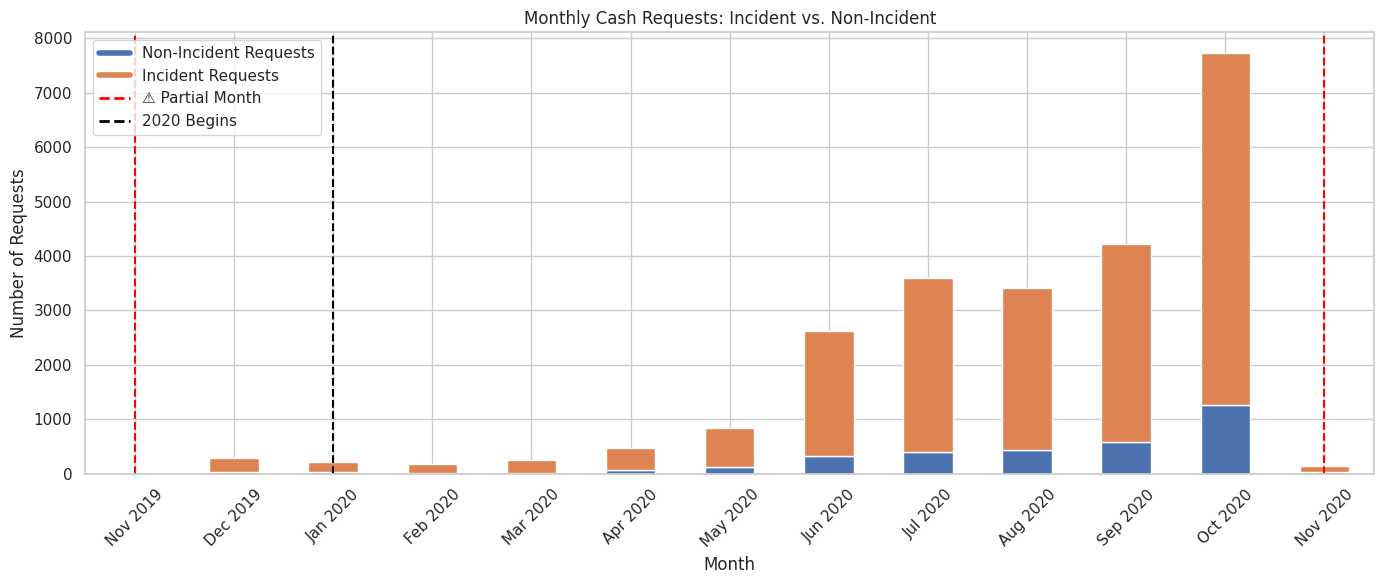

In [11]:
# --- ⚠️ Incident Trends Over Time ---

# 1. Prepare datetime field (already done earlier, safe to repeat)
cash_df['created_at'] = pd.to_datetime(cash_df['created_at'], errors='coerce')
cash_df['year_month'] = cash_df['created_at'].dt.to_period('M')

# 2. Classify incident status
cash_df['incident_flag'] = np.where(cash_df['recovery_status'].notna(), 'incident', 'no_incident')

# 3. Group by month and incident_flag
incident_trend = (
    cash_df
    .groupby(['year_month', 'incident_flag'])
    .size()
    .reset_index(name='count')
)

# 4. Pivot table for incident counts
incident_pivot = incident_trend.pivot(index='year_month', columns='incident_flag', values='count').fillna(0)

# 5. Prepare table for display
incident_table = incident_pivot.copy()
incident_table['Incident Ratio (%)'] = (
    incident_table['incident'] / (incident_table['incident'] + incident_table['no_incident'])
) * 100
incident_table = incident_table.reset_index()
incident_table['Month'] = incident_table['year_month'].dt.strftime('%b %Y')

# 6. Mark partial months
incident_table['Month'] = incident_table['Month'].replace({
    'Nov 2019': 'Nov 2019*',
    'Nov 2020': 'Nov 2020*'
})

# 7. Select and rename columns
incident_table = incident_table[['Month', 'incident', 'no_incident', 'Incident Ratio (%)']]
incident_table.columns = ['Month', 'Incident Requests', 'Non-Incident Requests', 'Incident Ratio (%)']

# 8. Display table
safe_print("📊 Monthly Incident Request Breakdown:")
display(incident_table)

# 9. Partial month note
safe_print("\n*️⃣ Note: Months marked with * are partial months.\n- Nov 2019: Data starts from November 19th.\n- Nov 2020: Data available only up to November 1st.")

# 10. Plot
fig, ax = plt.subplots(figsize=(14, 6))
incident_pivot.plot(kind='bar', stacked=True, color=['#4c72b0', '#dd8452'], ax=ax)

# Dashed lines for partial months
partial_months = {'2019-11': 'Nov 2019*', '2020-11': 'Nov 2020*'}
for month_period, label in partial_months.items():
    idx = incident_pivot.index.get_loc(pd.Period(month_period, freq='M'))
    ax.axvline(x=idx, color='red', linestyle='--', linewidth=1.5)

# Dashed line for Jan 2020
jan_2020_period = pd.Period('2020-01', freq='M')
if jan_2020_period in incident_pivot.index:
    jan_idx = incident_pivot.index.get_loc(jan_2020_period)
    ax.axvline(x=jan_idx, color='black', linestyle='--', linewidth=1.5)

# Titles and formatting
ax.set_title('Monthly Cash Requests: Incident vs. Non-Incident')
ax.set_ylabel('Number of Requests')
ax.set_xlabel('Month')
ax.set_xticklabels(incident_pivot.index.strftime('%b %Y'), rotation=45)
ax.grid(True, axis='y')

# Custom legend
custom_lines = [
    plt.Line2D([0], [0], color='#4c72b0', lw=4),
    plt.Line2D([0], [0], color='#dd8452', lw=4),
    plt.Line2D([0], [0], color='red', linestyle='--', lw=2),
    plt.Line2D([0], [0], color='black', linestyle='--', lw=2)
]
ax.legend(custom_lines, ['Non-Incident Requests', 'Incident Requests', '⚠️ Partial Month', '2020 Begins'], loc='upper left')

plt.tight_layout()

# 11. Save plot
if SAVE_PLOTS:
    filename = f"{plot_index:02d}_monthly_incident_trends.png"
    filepath = os.path.join(eda_plot_path, filename)
    if OVERWRITE_PLOTS or not os.path.exists(filepath):
        fig.savefig(filepath)
        safe_print(f"✅ Saved: {filename}")
        plot_index += 1
    else:
        safe_print(f"⚠️ Skipped (already exists): {filename}")
else:
    plot_index += 1

plt.show()


### 📊 Interpretation: Monthly Incident Trends in Cash Requests

The table and stacked bar chart above illustrate the evolution of cash request incidents over time.

- Throughout the observed period, **most cash requests did not involve incidents**.
- **Incident-related requests increased** notably during 2020, reaching a peak in **October 2020**.
- The **Incident Ratio (%)** remained relatively stable between 10–16% most months, indicating consistent risk levels.

⚠️ **Important Note about Partial Months:**
- **November 2019** and **November 2020** are **partial months**:
  - November 2019 data only starts from **November 19, 2019** (after mid-month).
  - November 2020 data only includes requests up to **November 1, 2020** (first day).
- Because of incomplete data, the **Incident Ratios** for these two months should be interpreted cautiously.

This view provides valuable insight into how platform risk exposure evolved and highlights periods of scaling challenges or shifts in user repayment behavior.


---
## 💸 Step 9: Fees Dataset Exploration

In this section, I analyze the **fees dataset** (`fees_df`) to understand the company's **revenue streams**, **user cost behavior**, and **potential operational risks**.

I will:
- Explore fee **types**, **statuses**, **categories**, and **charge moments**
- Quantify and visualize **fee distributions**
- Track **total fees collected per month**
- Highlight operational patterns linked to user repayments and platform revenue

---



📊 Value Counts for 'type':


,count
type,
instant_payment,11095
postpone,7766
incident,2196


✅ Saved: 12_fees_distribution_type.png


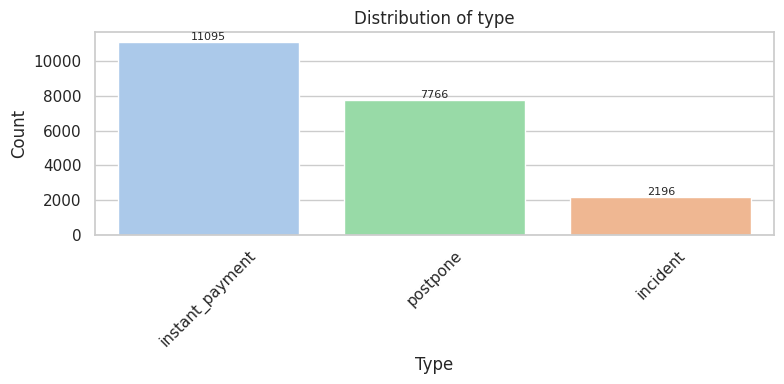


📊 Value Counts for 'status':


,count
status,
accepted,14841
cancelled,4934
rejected,1194
confirmed,88


✅ Saved: 13_fees_distribution_status.png


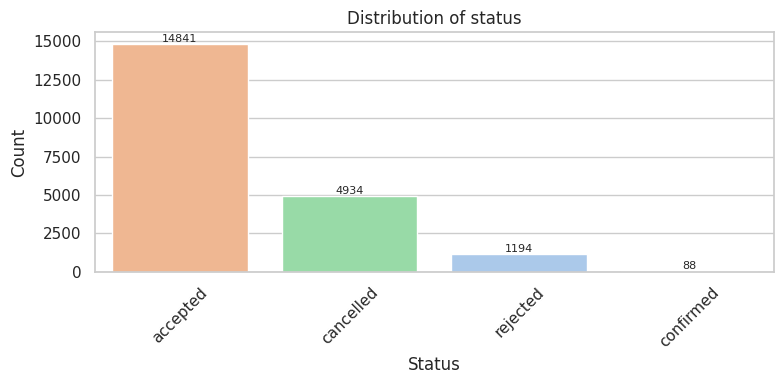


📊 Value Counts for 'category':


,count
category,
missing,18861
rejected_direct_debit,1599
month_delay_on_payment,597


✅ Saved: 14_fees_distribution_category.png


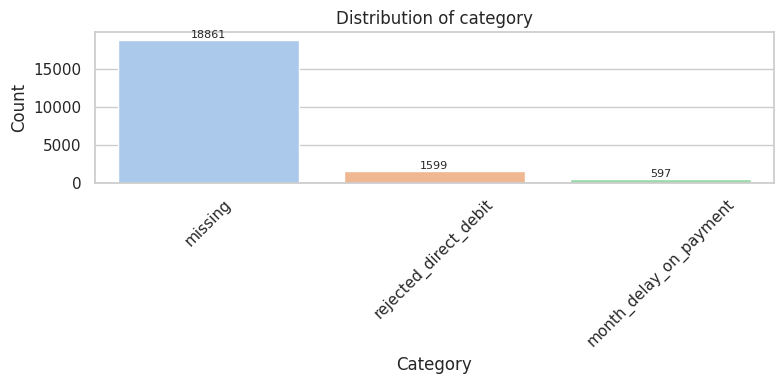


📊 Value Counts for 'charge_moment':


,count
charge_moment,
after,16720
before,4337


✅ Saved: 15_fees_distribution_charge_moment.png


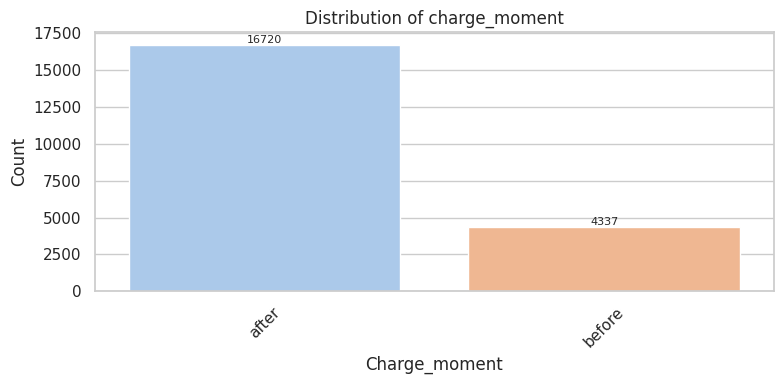

In [12]:
# --- 💸 Fees Overview ---

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Columns to check
fee_cols = ['type', 'status', 'category', 'charge_moment']

# 2. Function to annotate counts
def annotate_counts(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8)

# 3. Loop through each categorical column
for col in fee_cols:
    safe_print(f"\n📊 Value Counts for '{col}':")
    temp_col = fees_df[col].fillna('missing')
    display(temp_col.value_counts())

    # Plot
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(
        x=temp_col,
        hue=temp_col,
        palette='pastel',
        legend=False,
        order=temp_col.value_counts().index
    )
    annotate_counts(ax)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()

    # Save plot
    if SAVE_PLOTS:
        filename = f"{plot_index:02d}_fees_distribution_{col}.png"
        filepath = os.path.join(eda_plot_path, filename)
        if OVERWRITE_PLOTS or not os.path.exists(filepath):
            plt.savefig(filepath)
            safe_print(f"✅ Saved: {filename}")
        else:
            safe_print(f"⚠️ Skipped (already exists): {filename}")
    plot_index += 1

    plt.show()


### 📊 Interpretation: Fee Dataset Categorical Distributions

The charts and tables above provide insight into the structure of the fees data:

#### 💳 `type`
- The majority of fees are related to `instant_payment`, followed by `postpone` fees.
- `incident` fees are less frequent, but important to monitor due to their link with payment problems.

#### ✅ `status`
- Most fees are `accepted`, indicating successful processing.
- `cancelled` and `rejected` fees represent smaller but notable portions, hinting at payment issues or user cancellations.

#### 📂 `category`
- The `category` field is **mostly missing**, which is expected because it only applies to incident-related fees, not to instant payment or postponement fees.
- Among filled entries, `rejected_direct_debit` dominates, with some `month_delay_on_payment` cases as well.

#### ⏳ `charge_moment`
- Most fees are charged **after** the cash request (i.e., after the service is used).
- A significant portion (~20%) are charged **before** (immediately upon service creation, such as instant transfers or postponements).

---
This categorical overview highlights the **strong role of instant payments and postponements** in Ironhack Payments' business model and sets up further investigation into **fee-driven revenue trends**.


---
## 💸 Step 10: Total Revenue by Fee Type

In this step, I explore the **total revenue generated** by each **type of fee** across the platform.

This initial breakdown will help me:
- Identify which fee types contribute the most to the overall revenue
- Set the stage for deeper analysis by charge timing (before vs after reimbursement)

Understanding **which types of user actions** (e.g., instant requests, postponements, incidents) **drive revenue** is crucial before segmenting users into cohorts.

---


📊 Total Revenue by Fee Type:


,type,total_amount
1,instant_payment,55480.0
2,postpone,38830.0
0,incident,10980.0


✅ Saved: 16_revenue_by_fee_type.png


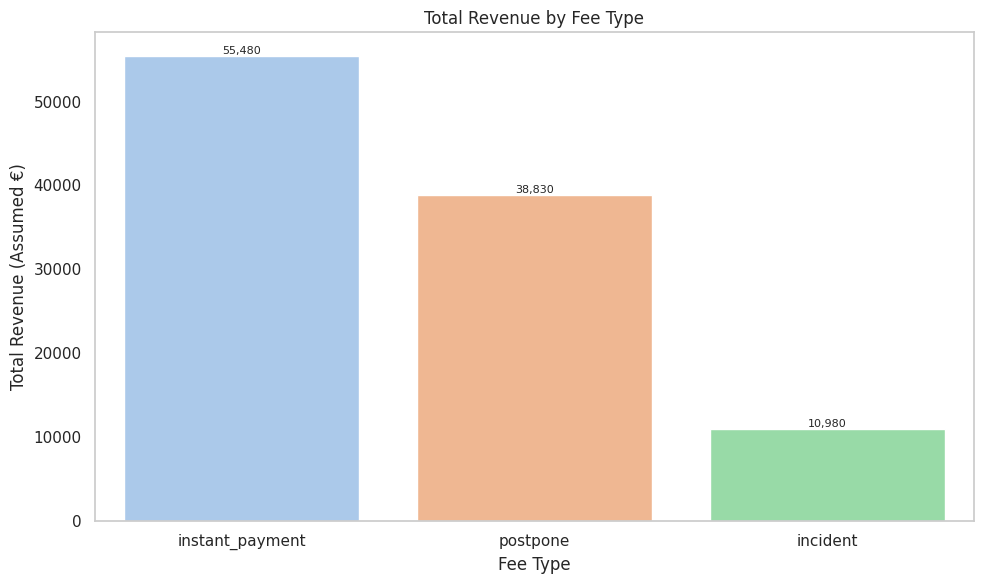

In [13]:
# --- 💸 Total Revenue by Fee Type ---

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Group by type and sum total_amount
revenue_by_type = (
    fees_df
    .groupby('type')['total_amount']
    .sum()
    .reset_index()
    .sort_values(by='total_amount', ascending=False)
)

# 2. Display table
safe_print("📊 Total Revenue by Fee Type:")
display(revenue_by_type)

# 3. Plot grouped bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=revenue_by_type,
    x='type',
    y='total_amount',
    hue='type',  # ✅ Explicit hue to avoid future warnings
    legend=False,
    palette='pastel'
)

plt.title('Total Revenue by Fee Type')
plt.xlabel('Fee Type')
plt.ylabel('Total Revenue (Assumed €)')
plt.grid(axis='y')

# Annotate bar tops
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()

# 💾 Save plot
if SAVE_PLOTS:
    filename = f"{plot_index:02d}_revenue_by_fee_type.png"
    filepath = os.path.join(eda_plot_path, filename)
    if OVERWRITE_PLOTS or not os.path.exists(filepath):
        plt.savefig(filepath)
        safe_print(f"✅ Saved: {filename}")
    else:
        safe_print(f"⚠️ Skipped (already exists): {filename}")
plot_index += 1

plt.show()


### 💡 Interpretation: Total Revenue by Fee Type

The table and bar chart above show the total revenue generated by each fee type:

- **Instant Payment fees** generate the highest revenue, totaling approximately **€55,480**.
- **Postpone fees** contribute the second-highest amount, with about **€38,830**.
- **Incident fees** (charged after failed reimbursements) bring in about **€10,980**.

🔎 **Key Insight:**  
Instant Payment fees are the platform’s **largest revenue driver**, reflecting the strong user preference for instant cash transfers despite the associated cost.


---
## 💸 Step 11: Total Revenue by Fee Type and Charge Timing

Now that I have seen the distribution of fees, i analyze the **total revenue generated** by different fee types, segmented by when they are charged.

This step will help me understand:
- Which types of fees contribute the most to total revenue
- Whether fees charged before or after the cash request have a greater financial impact

---


📊 Total Revenue by Fee Type and Charge Moment:


,type,charge_moment,total_amount
0,incident,after,10980.0
1,instant_payment,after,55480.0
2,postpone,after,17145.0
3,postpone,before,21685.0


✅ Saved: 17_revenue_by_type_and_charge_moment.png


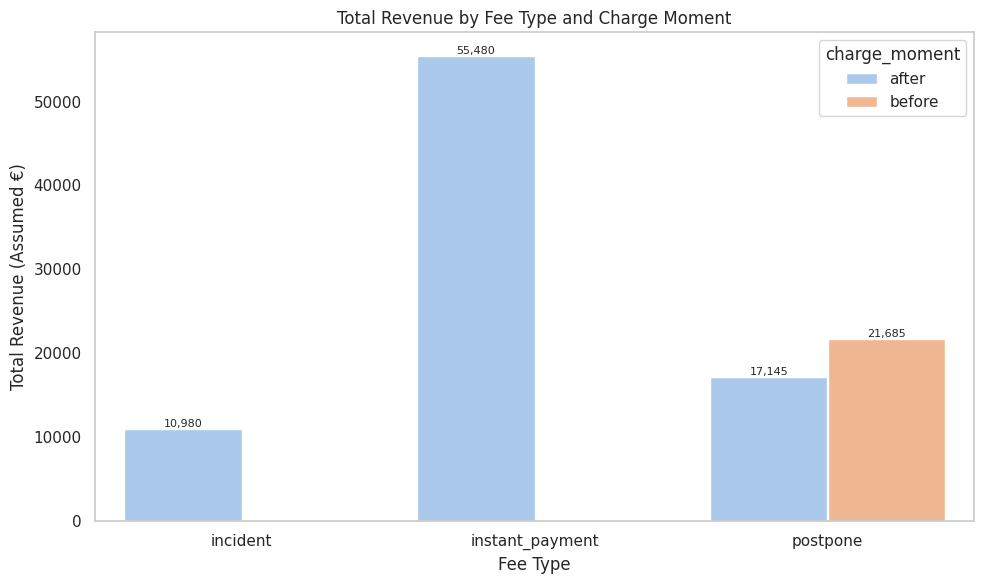

In [14]:
# --- 💸 Total Revenue by Fee Type and Charge Moment ---

# 1. Group by type and charge_moment, summing total_amount
fee_revenue = (
    fees_df
    .groupby(['type', 'charge_moment'])['total_amount']
    .sum()
    .reset_index()
)

# 2. Display table
safe_print("📊 Total Revenue by Fee Type and Charge Moment:")
display(fee_revenue)

# 3. Plot grouped bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=fee_revenue,
    x='type',
    y='total_amount',
    hue='charge_moment',
    palette='pastel'
)

plt.title('Total Revenue by Fee Type and Charge Moment')
plt.xlabel('Fee Type')
plt.ylabel('Total Revenue (Assumed €)')
plt.grid(axis='y')

# Annotate bar tops
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()

# 💾 Save plot
if SAVE_PLOTS:
    filename = f"{plot_index:02d}_revenue_by_type_and_charge_moment.png"
    filepath = os.path.join(eda_plot_path, filename)
    if OVERWRITE_PLOTS or not os.path.exists(filepath):
        plt.savefig(filepath)
        safe_print(f"✅ Saved: {filename}")
    else:
        safe_print(f"⚠️ Skipped (already exists): {filename}")
plot_index += 1

plt.show()


### 💡 Interpretation: Fee Types and Charge Timing

The table and stacked bar chart above reveal how different fee types are associated with when they are charged:

- **Postpone fees** can occur **either before or after** the cash request's reimbursement:
  - Some users pay immediately when requesting to postpone ("before").
  - Others are allowed to defer payment until after reimbursement ("after").
- **Instant Payment fees** are **always charged after** the cash request is reimbursed, even though the cash is sent instantly.
- **Incident fees** (penalties for failed reimbursements) are also **only charged after** the incident occurs.

### 💶 Interpretation: Total Revenue by Fee Type and Charge Moment

The table and chart above show how fees translate into total revenue, based on their type and the moment they are charged:

- The **highest revenue** comes from **instant payment fees**, totaling **€55,480**, all charged **after** the cash request is reimbursed.
- **Postpone fees** generate **€38,830 in total**, split between **€21,685 (before)** and **€17,145 (after)** — indicating users are often charged both upfront and later.
- **Incident fees** contribute **€10,980**, all charged **after** failed reimbursements.

This breakdown highlights how different fee strategies impact revenue collection, with **instant payments being the dominant driver**, followed by the flexibility of postpone charges.


---
## 📊 Step 12: Frequency of Fee Amounts

As observed during the **data cleaning phase** in `1_data_cleaning_ironhack_payments.ipynb`, the `total_amount` column in the `fees` dataset only contains **two unique values: €5 and €10**.

Instead of using a histogram (which is better suited for continuous data), I’ll use a **bar chart** to visualize how frequently each of these flat fee values occurs.

This confirms whether the platform uses a **standardized fee structure** or varies charges more widely.

---


📋 Frequency of Fee Amounts:


,Total Amount (€),Frequency
0,5.0,21056
1,10.0,1


✅ Saved: 18_fee_amount_frequencies.png


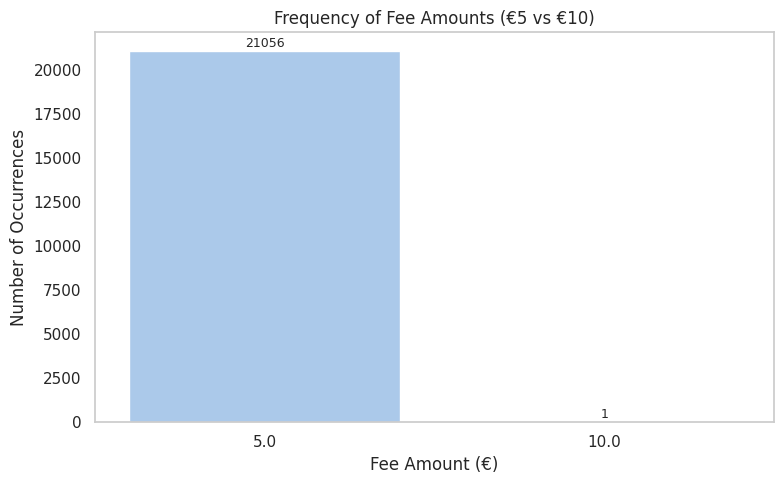

In [15]:
# --- 📊 Frequency of Fee Amounts ---

# 1. Count frequencies of total_amount
amount_counts = fees_df['total_amount'].value_counts().sort_index()

# 2. Create a DataFrame for easy table display
amount_counts_df = amount_counts.reset_index()
amount_counts_df.columns = ['Total Amount (€)', 'Frequency']

# 3. Display table
safe_print("📋 Frequency of Fee Amounts:")
display(amount_counts_df)

# 4. Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=amount_counts_df,
    x='Total Amount (€)',
    y='Frequency',
    hue='Total Amount (€)',  # Avoids future warning
    palette='pastel',
    legend=False
)

# 5. Annotate bar tops
for i in range(amount_counts_df.shape[0]):
    plt.text(x=i,
             y=amount_counts_df.loc[i, 'Frequency'] + 50,
             s=f"{amount_counts_df.loc[i, 'Frequency']}",
             ha='center', va='bottom', fontsize=9)

# 6. Title and labels
plt.title('Frequency of Fee Amounts (€5 vs €10)')
plt.xlabel('Fee Amount (€)')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)
plt.grid(axis='y')

# 7. Save plot if needed
if SAVE_PLOTS:
    filename = f"{plot_index:02d}_fee_amount_frequencies.png"
    filepath = os.path.join(eda_plot_path, filename)
    if OVERWRITE_PLOTS or not os.path.exists(filepath):
        plt.savefig(filepath)
        safe_print(f"✅ Saved: {filename}")
    else:
        safe_print(f"⚠️ Skipped (already exists): {filename}")
plot_index += 1

# 8. Adjust layout and show
plt.tight_layout()
plt.show()


### 💡 Interpretation: Fee Amount Frequencies

The table and bar chart above reveal a **highly uniform distribution** of fee amounts:

- Nearly all fees (21,056 out of 21,057) are set to **€5**, representing **more than 99.99%** of all entries.
- Only **1 single case** shows a fee of **€10**, which could be an **exception**, a **test value**, or a **manual override**.

This strong consistency suggests that the platform currently applies a **flat-rate model** for most fees, likely for simplicity and transparency. However, the presence of a single outlier may merit a quick **data validation check** or follow-up with the business team to confirm intent.


---
## 🔗 Step 13: Identify and Rename Overlapping Columns Before Merging

Before linking the datasets, I need to carefully identify **columns that share the same name** but **refer to different concepts** in `cash_df` and `fees_df`.

| Column Name  | cash_df Meaning                         | fees_df Meaning                         | Action |
|:-------------|:----------------------------------------|:----------------------------------------|:-------|
| `id`         | Cash request ID (Primary Key)           | Fee ID (Primary Key)                    | Rename: `cash_request_id` in `cash_df`, `fee_id` in `fees_df` |
| `created_at` | When cash request was created           | When fee was created                    | Rename: `cash_created_at` in `cash_df`, `fee_created_at` in `fees_df` |
| `updated_at` | When cash request was last updated      | When fee was last updated               | Rename: `cash_updated_at` in `cash_df`, `fee_updated_at` in `fees_df` |
| `status`     | Status of cash request (money_back, etc.) | Status of the fee (accepted, cancelled) | Rename: `cash_status` in `cash_df`, `fee_status` in `fees_df` |

In addition:
- `cash_df['cash_request_id']` will serve as the **Primary Key** for cash requests.
- `fees_df['cash_request_id']` will serve as the **Foreign Key** to link fees to cash requests.

✅ These renamings will avoid confusion and prevent accidental overwriting during the merge process.

---


In [16]:
# --- 🔗 Rename Overlapping Columns Before Merging ---

# 1. Rename columns in cash_df
cash_df = cash_df.rename(columns={
    'id': 'cash_request_id',
    'created_at': 'cash_created_at',
    'updated_at': 'cash_updated_at',
    'status': 'cash_status'
})

# 2. Rename columns in fees_df
fees_df = fees_df.rename(columns={
    'id': 'fee_id',
    'created_at': 'fee_created_at',
    'updated_at': 'fee_updated_at',
    'status': 'fee_status'
})

# ✅ Confirm renaming
safe_print("✅ Renaming complete. Updated columns:")

safe_print("\n📂 cash_df columns:")
safe_print(cash_df.columns.tolist())

safe_print("\n📂 fees_df columns:")
safe_print(fees_df.columns.tolist())


✅ Renaming complete. Updated columns:

📂 cash_df columns:
['cash_request_id', 'final_user_id', 'amount', 'cash_status', 'transfer_type', 'reimbursement_date', 'cash_created_at', 'cash_updated_at', 'user_id', 'moderated_at', 'deleted_account_id', 'cash_request_received_date', 'money_back_date', 'send_at', 'recovery_status', 'reco_creation', 'reco_last_update', 'year_month', 'month_label', 'recovery_status_clean', 'incident_flag']

📂 fees_df columns:
['fee_id', 'cash_request_id', 'total_amount', 'type', 'fee_status', 'fee_created_at', 'category', 'reason', 'fee_updated_at', 'paid_at', 'from_date', 'to_date', 'charge_moment']


---
## 🔗 Step 14: Linking Fees to Cash Requests

In this step, I will **merge** the `fees_df` and `cash_df` datasets to enable a full analysis of how fees relate to cash requests.

### 🔍 Key Points Before Merge:
- In **Notebook 1** (`1_data_cleaning_ironhack_payments.ipynb`), I validated the integrity of the `cash_request_id` field:
  - ✅ I confirmed that **only 4 rows** in `fees_df` had unmatched or missing `cash_request_id`.
  - ✅ These unmatched records were identified as **cancelled system artifacts** because:
    - They had `status = cancelled`
    - They were missing financial and lifecycle information (`paid_at`, `from_date`, `to_date`)
    - They did not link to any valid cash request
  - ✅ I removed those 4 rows during cleaning to ensure safe and accurate merging.

### 🔄 Merge Strategy:
- I will now **left join** `fees_df` to `cash_df`, matching:
  - `cash_df['cash_request_id']` ⬌ `fees_df['cash_request_id']`
- A **left join** is appropriate because:
  - I want to retain **all cash requests**, including those without any associated fees.

### ⚙️ Important Renaming Reminder:
- To avoid column name conflicts:
  - In `cash_df`, the `id` column was renamed to `cash_request_id`.
  - In `fees_df`, the `id` column was renamed to `fee_id`.
  - Similarly, `status`, `created_at`, and `updated_at` were renamed with prefixes (`cash_`, `fee_`).

This setup ensures a **safe, clear, and consistent merge** without overwriting important information from either dataset.

---


In [17]:
# --- 🔗 Linking Fees to Cash Requests ---

# 1. Perform the merge
# I am doing a LEFT JOIN to keep all cash requests even if no fee is linked
merged_df = cash_df.merge(
    fees_df,
    how='left',
    left_on='cash_request_id',
    right_on='cash_request_id',
    suffixes=('_cash', '_fee')  # extra safety, although columns were renamed
)

# 2. Check merge results
safe_print("✅ Merge complete. New merged dataset structure:")
safe_print(f"📂 merged_df shape: {merged_df.shape}")

# 3. Quick verification after merge

# Total cash requests
total_cash_requests = merged_df['cash_request_id'].nunique()

# Cash requests with at least one fee (type is not null)
cash_requests_with_fees = merged_df[merged_df['type'].notna()]['cash_request_id'].nunique()

# Print summary
safe_print(f"\n📊 Quick Summary After Merge:")
safe_print(f"📌 Total Cash Requests: {total_cash_requests:,}")
safe_print(f"📌 Cash Requests with at least one fee: {cash_requests_with_fees:,}")
safe_print(f"📌 Percentage with at least one fee: {cash_requests_with_fees / total_cash_requests:.2%}")

# 4. Preview a few rows
display(merged_df.head())


✅ Merge complete. New merged dataset structure:
📂 merged_df shape: (32094, 33)

📊 Quick Summary After Merge:
📌 Total Cash Requests: 23,970
📌 Cash Requests with at least one fee: 12,933
📌 Percentage with at least one fee: 53.95%


,cash_request_id,final_user_id,amount,cash_status,transfer_type,reimbursement_date,cash_created_at,cash_updated_at,user_id,moderated_at,deleted_account_id,cash_request_received_date,money_back_date,send_at,recovery_status,reco_creation,reco_last_update,year_month,month_label,recovery_status_clean,incident_flag,fee_id,total_amount,type,fee_status,fee_created_at,category,reason,fee_updated_at,paid_at,from_date,to_date,charge_moment
0,5,804.0,100.0,rejected,regular,2020-01-09 19:05:21.596363,2019-12-10 19:05:21.596873,2019-12-11 16:47:42.407830,804.0,2019-12-11 16:47:42.405646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12,Dec 2019,missing,no_incident,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70,231.0,100.0,rejected,regular,2020-01-09 19:50:12.347780,2019-12-10 19:50:12.347780,2019-12-11 14:24:22.900054,231.0,2019-12-11 14:24:22.897988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12,Dec 2019,missing,no_incident,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,191.0,100.0,rejected,regular,2020-01-09 19:13:35.825041,2019-12-10 19:13:35.825460,2019-12-11 09:46:59.779773,191.0,2019-12-11 09:46:59.777728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12,Dec 2019,missing,no_incident,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,761.0,99.0,rejected,regular,2020-01-09 19:16:10.879606,2019-12-10 19:16:10.880172,2019-12-18 14:26:18.136163,761.0,2019-12-18 14:26:18.128407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12,Dec 2019,missing,no_incident,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1594,7686.0,100.0,rejected,regular,NaN,2020-05-06 09:59:38.877376,2020-05-07 09:21:55.340080,7686.0,2020-05-07 09:21:55.320193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05,May 2020,missing,no_incident,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 🔎 Interpretation: Linking Fees to Cash Requests

In this step, I successfully merged the `cash_df` and `fees_df` datasets.

- I used a **left join**, keeping all cash requests even if no fee was associated.
- The merged dataset (`merged_df`) has **32,094 rows** and **33 columns**.
- Cash requests **without any related fees** have `NaN` values in the fee-related columns.
- 🔄 **Important**: Some cash requests appear **multiple times** in `merged_df` because **one cash request can have multiple associated fees** (e.g., an instant payment fee and later an incident fee). Each combination generates a separate row during the merge.
- This duplication explains why the merged dataset has **more rows** than either of the original cleaned datasets.
- This structure will allow me to analyze both **cash request activity** and **associated fee behavior** together.

To validate the merge, I ran a quick linkage check:

| Metric | Value | Meaning |
|:---|:---|:---|
| 📌 **Total Cash Requests** | 23,970 | Number of unique cash requests before merging |
| 📌 **Cash Requests with at least one fee** | 12,933 | Number of unique cash requests that had one or more linked fees |
| 📌 **Percentage with at least one fee** | 53.95% | Percentage of cash requests that generated fees |

This shows that **around half** of all cash requests had **at least one associated fee** (such as instant payment, postpone, or incident fees), while the other half did not trigger any fee.

This merged dataset forms the basis for the next steps, where I will explore relationships between **request outcomes**, **user behavior**, and **financial performance**.


---
## 📊 Step 15: Analyzing Relationships Between Cash Request Status and Fee Type

Now that I have a merged dataset linking cash requests and associated fees,  
I want to explore whether certain **cash request statuses** (e.g., `money_back`, `rejected`, `direct_debit_rejected`) are associated more frequently with specific **fee types** (e.g., `instant_payment`, `postpone`, `incident`).

In this step, I will:
- Create a **pivot table** showing the number of fees by `cash_status` and `fee type`
- Visualize the relationship using a **heatmap**
- Interpret any strong patterns that emerge (e.g., incident fees linked with failed payments)

This helps to better understand **user behavior** and **risk profiles** across different service outcomes.

---


📋 Pivot Table: Cash Request Status vs Fee Type


type,incident,instant_payment,postpone
cash_status,,,
active,46,41,68
canceled,2,4,0
direct_debit_rejected,636,589,633
direct_debit_sent,13,29,30
money_back,1499,10384,7035
transaction_declined,0,48,0


✅ Saved: 19_heatmap_cash_status_vs_fee_type.png


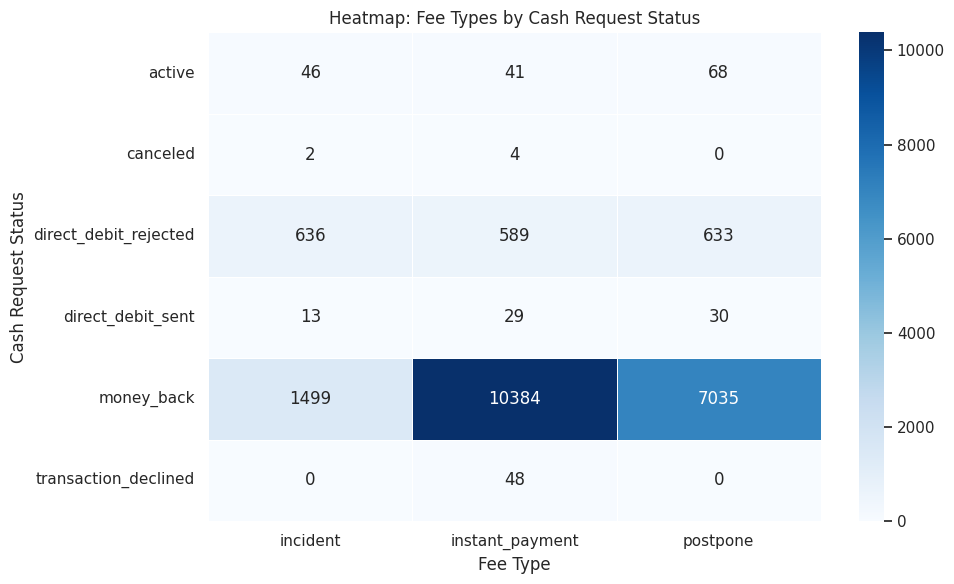

In [18]:
# --- 📊 Analyzing Relationships Between Cash Request Status and Fee Type ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a pivot table (cross-tab) between cash_status and fee type
status_fee_pivot = (
    merged_df
    .pivot_table(
        index='cash_status',  # cash request status (e.g., money_back, rejected)
        columns='type',       # fee type (e.g., instant_payment, postpone, incident)
        values='fee_id',      # count of fees (fee_id is not null if a fee exists)
        aggfunc='count',      # counting number of fees
        fill_value=0
    )
)

# 2. Display the table
safe_print("📋 Pivot Table: Cash Request Status vs Fee Type")
display(status_fee_pivot)

# 3. Plot heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(status_fee_pivot, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title("Heatmap: Fee Types by Cash Request Status")
plt.xlabel("Fee Type")
plt.ylabel("Cash Request Status")
plt.tight_layout()

if SAVE_PLOTS:
    filename = f"{plot_index:02d}_heatmap_cash_status_vs_fee_type.png"
    filepath = os.path.join(eda_plot_path, filename)
    if OVERWRITE_PLOTS or not os.path.exists(filepath):
        plt.savefig(filepath)
        safe_print(f"✅ Saved: {filename}")
    else:
        safe_print(f"⚠️ Skipped (already exists): {filename}")
plot_index += 1

plt.show()


### 💡 Interpretation: Fee Types by Cash Request Status

The pivot table and heatmap reveal strong patterns between **cash request statuses** and **fee types**:

- **Money Back** is by far the most common outcome linked to fees, especially:
  - **Instant Payment fees**: 10,384 occurrences
  - **Postpone fees**: 7,035 occurrences
  - **Incident fees**: 1,499 occurrences
- **Direct Debit Rejected** cases are also significant:
  - Linked to **incident**, **instant_payment**, and **postpone** fees almost equally (~600 each).
- **Active** requests have relatively few associated fees (especially postpone fees).
- **Direct Debit Sent** requests occasionally trigger small numbers of fees.
- **Canceled** and **Transaction Declined** statuses almost never generate fees.

🔍 **Key Insights:**
- **Fee revenue** mainly comes from **successful "money_back" cases**.
- **Postpone** and **incident fees** seem tied to repayment difficulty, explaining their presence in "direct_debit_rejected" and "money_back" statuses.
- Other statuses (canceled, declined) do not significantly contribute to fee generation.

This pattern helps confirm that **fees are highly dependent on cash request resolution**, not just the request itself.


---
## 📊 Step 16: Total Revenue by Cash Request Status

After exploring how fees are distributed across different request outcomes, I will now analyze:

- How much **total revenue** is associated with each **cash request status**.
- Which outcomes contribute the most to the platform's earnings.

This provides financial insights into **where the platform's revenue is generated**, not just how many requests occur.

---


📋 Total Revenue by Cash Request Status:


,Cash Request Status,Total Revenue (€)
4,money_back,94595.0
2,direct_debit_rejected,9290.0
0,active,775.0
3,direct_debit_sent,360.0
6,transaction_declined,240.0
1,canceled,30.0
5,rejected,0.0


✅ Saved: 20_revenue_by_cash_status.png


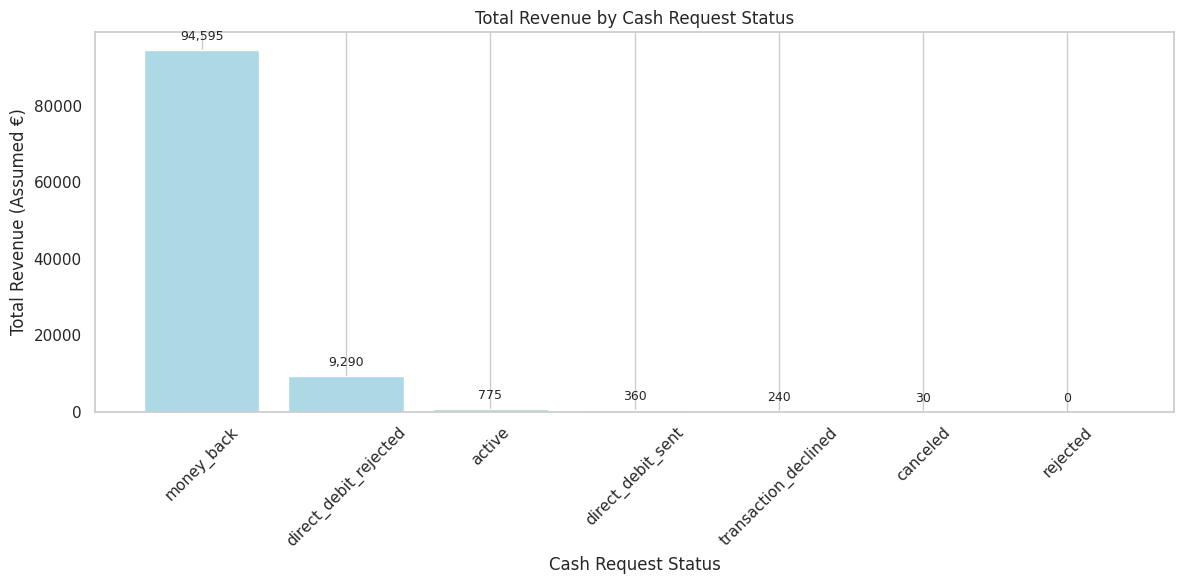

In [19]:
# --- 💰 Total Revenue by Cash Request Status ---

# 1. Group by cash_status and sum total_amount
revenue_by_status = (
    merged_df
    .groupby('cash_status')['total_amount']
    .sum()
    .reset_index()
    .sort_values(by='total_amount', ascending=False)
)

# 2. Fill NaNs (no associated fees) with 0
revenue_by_status['total_amount'] = revenue_by_status['total_amount'].fillna(0)

# 3. Rename columns for clarity
revenue_by_status.columns = ['Cash Request Status', 'Total Revenue (€)']

# 4. Display table
safe_print("📋 Total Revenue by Cash Request Status:")
display(revenue_by_status)

# 5. Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(revenue_by_status['Cash Request Status'], revenue_by_status['Total Revenue (€)'], color='lightblue')

# Annotate bar tops
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.0f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

plt.title('Total Revenue by Cash Request Status')
plt.ylabel('Total Revenue (Assumed €)')
plt.xlabel('Cash Request Status')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# 💾 Save plot
if SAVE_PLOTS:
    filename = f"{plot_index:02d}_revenue_by_cash_status.png"
    filepath = os.path.join(eda_plot_path, filename)
    if OVERWRITE_PLOTS or not os.path.exists(filepath):
        plt.savefig(filepath)
        safe_print(f"✅ Saved: {filename}")
    else:
        safe_print(f"⚠️ Skipped (already exists): {filename}")
plot_index += 1

plt.show()


### 📊 Interpretation: Total Revenue by Cash Request Status

The table and bar chart above show how revenue varies based on the outcome of cash requests:

- 💰 **Money Back** requests generate the **most revenue** by far, contributing over **€94,000** in total fees. This makes sense since most successful cash requests end with reimbursement, triggering associated fees (instant payment, postpone, etc.).
- ⚠️ **Direct Debit Rejected** requests are the **second** highest revenue source, totaling around **€9,290**, likely due to **incident fees** triggered after failed reimbursements.
- 🟰 **Active**, **Direct Debit Sent**, and **Transaction Declined** statuses contribute **minor amounts** of revenue in comparison.
- 🚫 **Canceled** requests almost generate **no revenue**.
- ❌ **Rejected** requests have **zero revenue**, as these requests were not fulfilled, and thus no fees could be charged.

This analysis helps confirm that **platform revenue is tightly linked to user repayment behavior**, and that fees are successfully collected in most "money_back" scenarios.



---
## 📆 Step 17: Identify First Cash Request Date Per User (Cohort Preparation)

Before defining user cohorts, I need to determine the **first cash request date** for each user.

This step will:
- Assign each `final_user_id` their **earliest request date** (`cash_created_at`)
- Derive two key cohort identifiers:
  - 🧾 `cohort_month` → Human-readable label for charts (e.g., `"Jan 2020"`)
  - 🔢 `cohort_year_month` → Sortable label for timeline alignment (e.g., `"2020-01"`)

Identifying when each user first requested funds is essential for cohort tracking, retention analysis, and revenue attribution by user generation.
---


In [20]:
# --- 📆 First Cash Request Date per User ---

# 1. Ensure cash_created_at is datetime
cash_df['cash_created_at'] = pd.to_datetime(cash_df['cash_created_at'], errors='coerce')

# 2. Group by final_user_id and find the first request date
user_first_request = (
    cash_df
    .groupby('final_user_id')['cash_created_at']
    .min()
    .reset_index()
    .rename(columns={'cash_created_at': 'first_request_date'})
)

# 3. Create human-readable and sortable cohort columns
user_first_request['cohort_month'] = user_first_request['first_request_date'].dt.strftime('%b %Y')   # e.g., 'Jan 2020'
user_first_request['cohort_year_month'] = user_first_request['first_request_date'].dt.to_period('M').astype(str)  # e.g., '2020-01'

# 4. Display sample
safe_print("📋 First Cash Request Date and Cohort Month per User:")
display(user_first_request.head())

# 5. Basic Summary
safe_print(f"📊 Total unique users identified: {user_first_request.shape[0]:,}")


📋 First Cash Request Date and Cohort Month per User:


,final_user_id,first_request_date,cohort_month,cohort_year_month
0,34.0,2020-04-20 15:50:21.187257,Apr 2020,2020-04
1,35.0,2019-12-13 20:27:38.106778,Dec 2019,2019-12
2,47.0,2019-11-19 13:57:53.511561,Nov 2019,2019-11
3,52.0,2019-12-17 09:01:12.584634,Dec 2019,2019-12
4,53.0,2019-12-21 11:39:03.844436,Dec 2019,2019-12


📊 Total unique users identified: 11,793


### 🧠 Interpretation: First Cash Request Date and Cohort Month Assignment

The table above successfully assigns each user their **first cash request date**, along with two formats of the **cohort label**:

- 🧾 `cohort_month` (e.g., `"Nov 2019"`) — for readable labels
- 🔢 `cohort_year_month` (e.g., `"2019-11"`) — for accurate sorting and plotting

Key points:
- I identified **11,793 unique users** in the dataset.
- Each user is now linked to the month they first interacted with the platform.
- This cohort assignment will enable **trend analysis**, **user growth tracking**, and **behavioral segmentation** over time.

This user-level mapping is critical for calculating **Monthly Active Users (MAU)**, **retention rates**, and
**cohort-based revenue metrics** in the next steps.


---
## 📅 Step 18: Monthly Active Users (MAU) Tracking

Now that each user has a cohort month, I will analyze the **Monthly Active Users (MAU)**:

- MAU measures how many unique users performed at least one cash request each month.
- It provides insight into **platform growth**, **user engagement**, and **retention trends** over time.

---


📊 Monthly Active Users (MAU):


,activity_month_str,active_users
0,Nov 2019*,1
1,Dec 2019,255
2,Jan 2020,196
3,Feb 2020,170
4,Mar 2020,215
5,Apr 2020,421
6,May 2020,730
7,Jun 2020,2101
8,Jul 2020,2711
9,Aug 2020,2599



*️⃣ Note: Months marked with * are partial months.
- Nov 2019: Data starts from November 19th.
- Nov 2020: Data available only up to November 1st.
✅ Saved: 21_monthly_active_users.png


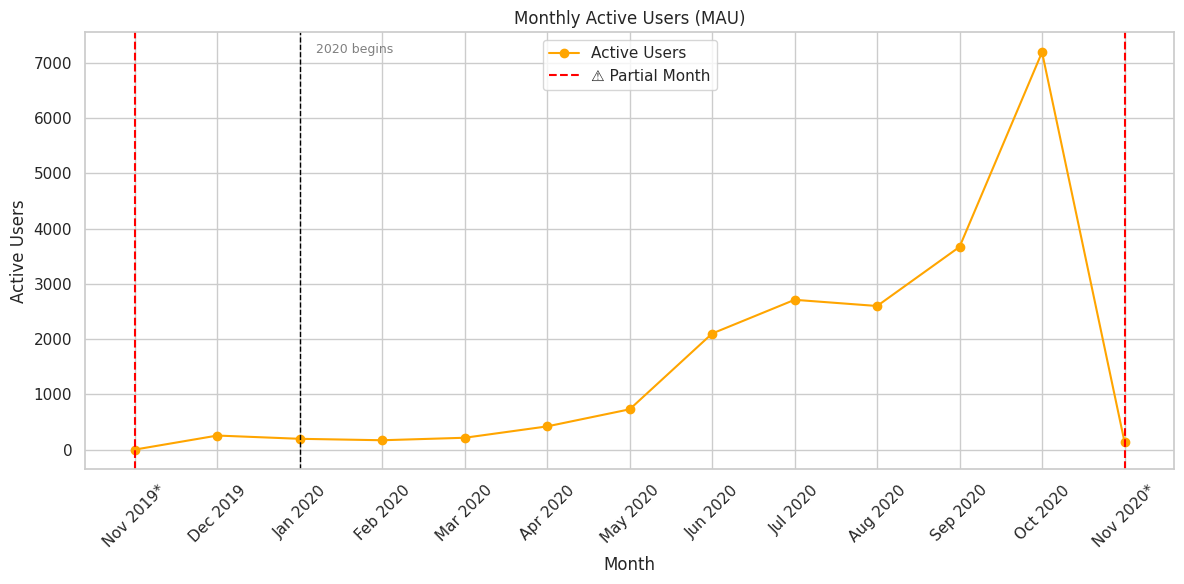

In [21]:
# --- 📈 Monthly Active Users (MAU) ---

import pandas as pd
import matplotlib.pyplot as plt
import os

# 1. Ensure datetime
cash_df['cash_created_at'] = pd.to_datetime(cash_df['cash_created_at'], errors='coerce')

# 2. Extract month
cash_df['activity_month'] = cash_df['cash_created_at'].dt.to_period('M')

# 3. Group by activity month
monthly_active_users = (
    cash_df
    .groupby('activity_month')['final_user_id']
    .nunique()
    .reset_index()
    .rename(columns={'final_user_id': 'active_users'})
)

# 4. Format month
monthly_active_users['activity_month_str'] = monthly_active_users['activity_month'].dt.strftime('%b %Y')

# 5. Mark partial months in table
table_to_display = monthly_active_users[['activity_month_str', 'active_users']].copy()
table_to_display['activity_month_str'] = table_to_display['activity_month_str'].replace({
    'Nov 2019': 'Nov 2019*',
    'Nov 2020': 'Nov 2020*'
})

# 6. Display table
safe_print("📊 Monthly Active Users (MAU):")
display(table_to_display)

safe_print("\n*️⃣ Note: Months marked with * are partial months.")
safe_print("- Nov 2019: Data starts from November 19th.")
safe_print("- Nov 2020: Data available only up to November 1st.")

# 7. Plot
plt.figure(figsize=(12, 6))
ax = plt.gca()
plt.plot(table_to_display['activity_month_str'], monthly_active_users['active_users'], marker='o', color='orange', label='Active Users')
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Month')
plt.ylabel('Active Users')
plt.xticks(rotation=45)

# Jan 2020 marker
if 'Jan 2020' in table_to_display['activity_month_str'].values:
    jan_2020_idx = table_to_display[table_to_display['activity_month_str'] == 'Jan 2020'].index[0]
    plt.axvline(x=jan_2020_idx, color='black', linestyle='--', linewidth=1)
    plt.text(jan_2020_idx + 0.2, plt.ylim()[1]*0.95, '2020 begins', fontsize=9, color='gray')

# Add only one red line to legend for partial month
partial_months = ['Nov 2019*', 'Nov 2020*']
for i, partial_month in enumerate(partial_months):
    if partial_month in table_to_display['activity_month_str'].values:
        idx = table_to_display[table_to_display['activity_month_str'] == partial_month].index[0]
        ax.axvline(
            x=idx, color='red', linestyle='--', linewidth=1.5,
            label='⚠️ Partial Month' if i == 0 else None
        )

# Show legend
handles, labels = ax.get_legend_handles_labels()
if handles:
    plt.legend()

plt.grid(True)
plt.tight_layout()

# 💾 Save plot
if SAVE_PLOTS:
    filename = f"{plot_index:02d}_monthly_active_users.png"
    filepath = os.path.join(eda_plot_path, filename)
    if OVERWRITE_PLOTS or not os.path.exists(filepath):
        plt.savefig(filepath)
        safe_print(f"✅ Saved: {filename}")
    else:
        safe_print(f"⚠️ Skipped (already exists): {filename}")
plot_index += 1

plt.show()


### 📈 Interpretation: Monthly Active Users (MAU)

The table and line chart above show the evolution of **Monthly Active Users (MAU)** based on cash request activity.

Key observations:
- User activity was minimal in **late 2019** with only **1 user** in **November 2019** (partial month) and **255 users** by **December 2019**.
- **Steady growth** began in early 2020, with user counts progressively increasing month-over-month.
- **Massive acceleration** occurred between **June and October 2020**, peaking at **7,191 active users** in **October 2020**.
- The sharp drop in **November 2020** is expected due to **partial month data** (only includes activity up to November 1st).

This MAU trend confirms **strong user acquisition** throughout 2020 and will support cohort-based retention and growth analysis in the next steps.


---
## 🚀 Step 19: Instant vs Regular Transfer Usage Over Time

In this step, I analyze how users' preference for **instant** versus **regular** cash transfers evolved over time.

Key questions:
- Was there a trend toward faster (instant) transfers?
- Did regular transfers decrease as instant options became more popular?
- Are there any seasonal effects?

Understanding these patterns will support **cohort segmentation** and **revenue strategy evaluation** in future analysis.

---


📋 Monthly Instant vs Regular Transfer Counts and Instant Share (%):


transfer_type,month_label,instant,regular,instant_share_percent
0,Nov 2019*,0,1,0.000000
1,Dec 2019,0,289,0.000000
2,Jan 2020,0,223,0.000000
3,Feb 2020,0,184,0.000000
4,Mar 2020,0,244,0.000000
5,Apr 2020,0,473,0.000000
6,May 2020,0,837,0.000000
7,Jun 2020,0,2615,0.000000
8,Jul 2020,344,3257,9.552902
9,Aug 2020,2506,911,73.339186



*️⃣ Note: Months marked with * are partial months.
- Nov 2019: Data starts from November 19th.
- Nov 2020: Data available only up to November 1st.
✅ Saved: 22_transfers_instant_vs_regular.png


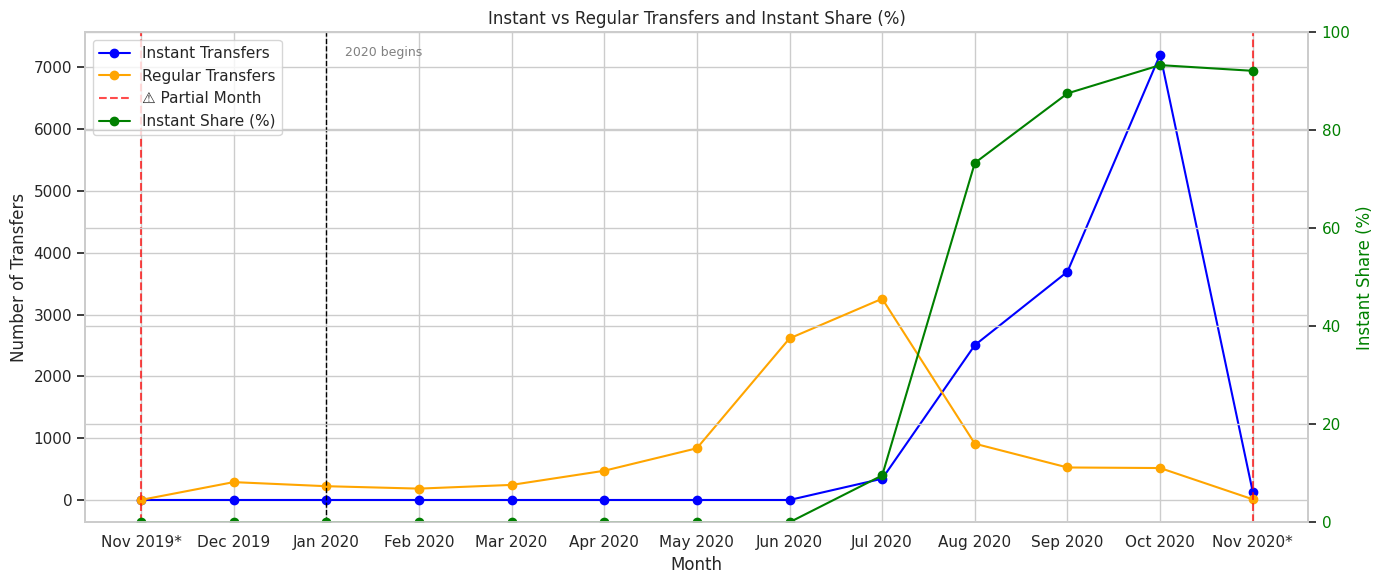

In [22]:
# --- 🚀 Instant vs Regular Transfers and Instant Share (%) ---

import matplotlib.pyplot as plt

# 1. Ensure datetime
cash_df['cash_created_at'] = pd.to_datetime(cash_df['cash_created_at'], errors='coerce')

# 2. Create year_month and month_label
cash_df['year_month'] = cash_df['cash_created_at'].dt.to_period('M')
cash_df['month_label'] = cash_df['cash_created_at'].dt.strftime('%b %Y')

# 3. Group by year_month and transfer_type
transfer_counts = (
    cash_df
    .groupby(['year_month', 'month_label', 'transfer_type'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
    .sort_values('year_month')
)

# 4. Calculate instant share (%)
transfer_counts['instant_share_percent'] = (
    transfer_counts['instant'] / (transfer_counts['instant'] + transfer_counts['regular'])
) * 100

# 5. Mark partial months with *
transfer_counts['month_label'] = transfer_counts['month_label'].replace({
    'Nov 2019': 'Nov 2019*',
    'Nov 2020': 'Nov 2020*'
})

# 6. Display final table
safe_print("📋 Monthly Instant vs Regular Transfer Counts and Instant Share (%):")
display(transfer_counts[['month_label', 'instant', 'regular', 'instant_share_percent']])
safe_print("\n*️⃣ Note: Months marked with * are partial months.\n- Nov 2019: Data starts from November 19th.\n- Nov 2020: Data available only up to November 1st.")

# 7. Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left Y-axis: Number of transfers
line1, = ax1.plot(transfer_counts['month_label'], transfer_counts['instant'], marker='o', label='Instant Transfers', color='blue')
line2, = ax1.plot(transfer_counts['month_label'], transfer_counts['regular'], marker='o', label='Regular Transfers', color='orange')
ax1.set_ylabel('Number of Transfers')
ax1.set_xlabel('Month')
ax1.set_title('Instant vs Regular Transfers and Instant Share (%)')
ax1.tick_params(axis='y')
ax1.grid(True)

# Right Y-axis: Instant share %
ax2 = ax1.twinx()
line3, = ax2.plot(transfer_counts['month_label'], transfer_counts['instant_share_percent'], marker='o', color='green', label='Instant Share (%)')
ax2.set_ylabel('Instant Share (%)', color='green')
ax2.set_ylim(0, 100)
ax2.tick_params(axis='y', labelcolor='green')

# Partial months (only one in legend)
partial_months = ['Nov 2019*', 'Nov 2020*']
for i, pm in enumerate(partial_months):
    idx = transfer_counts[transfer_counts['month_label'] == pm].index
    if not idx.empty:
        ax1.axvline(
            x=idx[0],
            color='red',
            linestyle='--',
            linewidth=1.5,
            alpha=0.7,
            label='⚠️ Partial Month' if i == 0 else None
        )

# Jan 2020 reference
if 'Jan 2020' in transfer_counts['month_label'].values:
    jan_idx = transfer_counts[transfer_counts['month_label'] == 'Jan 2020'].index[0]
    ax1.axvline(x=jan_idx, color='black', linestyle='--', linewidth=1)
    ax1.text(jan_idx + 0.2, ax1.get_ylim()[1]*0.95, '2020 begins', fontsize=9, color='gray')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()

# 💾 Save figure
if SAVE_PLOTS:
    filename = f"{plot_index:02d}_transfers_instant_vs_regular.png"
    filepath = os.path.join(eda_plot_path, filename)
    if OVERWRITE_PLOTS or not os.path.exists(filepath):
        fig.savefig(filepath)
        safe_print(f"✅ Saved: {filename}")
    else:
        safe_print(f"⚠️ Skipped (already exists): {filename}")
plot_index += 1

plt.show()


### 🚀 Interpretation: Instant vs Regular Transfer Usage Over Time

The table and chart above reveal strong shifts in user transfer preferences:

- 📈 **Instant transfers** were non-existent through early 2020, with **0% share** from **November 2019** to **June 2020**.
- ⚡ A sharp rise in instant usage started in **July 2020**, reaching **over 70%** by **August 2020**.
- 🚀 By **October 2020**, instant transfers dominated, making up **more than 93%** of all cash requests.
- 📉 Regular transfers declined correspondingly as instant options gained popularity.

Key takeaways:
- The instant transfer feature was likely **introduced around mid-2020**, rapidly becoming the preferred user option.
- This change may impact **cohort behavior**, **revenue per request**, and **user satisfaction trends**.
- ⚠️ **Partial months** (November 2019 and November 2020) should be interpreted cautiously due to limited data coverage.

These evolving transfer preferences will be important to consider during **cohort formation** and **KPI analysis**.


---
# 💾 Saving Key Aggregates for Cohort Analysis

Before moving to the next phase of the project (`3_cohort_analysis_metrics.ipynb`), I will save essential datasets created during EDA.

These exports will allow efficient loading later without recalculating:

| File | Purpose |
|:---|:---|
| `user_first_request.csv` | Maps each user to their first request date and cohort month |
| `monthly_active_users.csv` | Tracks Monthly Active Users (MAU) over time |
| `transfer_type_share.csv` | Analyzes instant vs regular transfer evolution per month |
| `merged_cash_fee.csv` | Full cash requests dataset linked with associated fees |

All files will be saved to the `data/` subfolder inside `eda_outputs/`, located within the project directory:

`My Drive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/eda_outputs/data/`
---


In [23]:
# --- 💾 Save Final EDA Aggregates ---

import os

# ✅ Config toggle: allow or prevent overwriting CSVs
OVERWRITE_CSV = True

# 📁 Define and ensure eda_outputs/data folder exists
eda_data_path = os.path.join(project_base_path, 'eda_outputs', 'data')
os.makedirs(eda_data_path, exist_ok=True)

# 🧭 Output directory note
safe_print(f"🧭 CSV outputs will be saved to: {eda_data_path}")

# 🔁 Helper function to save CSVs safely
def save_csv_if_allowed(df, filename):
    filepath = os.path.join(eda_data_path, filename)
    if OVERWRITE_CSV or not os.path.exists(filepath):
        df.to_csv(filepath, index=False)
        safe_print(f"✅ Saved: {filename}")
    else:
        safe_print(f"⚠️ Skipped (already exists): {filename}")

# 💾 Save User First Request Cohort Mapping
save_csv_if_allowed(user_first_request, 'user_first_request.csv')

# 💾 Save Monthly Active Users
save_csv_if_allowed(monthly_active_users, 'monthly_active_users.csv')

# 💾 Save Transfer Type Share per Month
save_csv_if_allowed(
    transfer_counts[['month_label', 'instant', 'regular', 'instant_share_percent']],
    'transfer_type_share.csv'
)

# 💾 Save Merged Dataset (Cash Requests + Fees linked)
save_csv_if_allowed(merged_df, 'merged_cash_fee.csv')


🧭 CSV outputs will be saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/eda_outputs/data
✅ Saved: user_first_request.csv
✅ Saved: monthly_active_users.csv
✅ Saved: transfer_type_share.csv
✅ Saved: merged_cash_fee.csv


---
# 📋 EDA Completion Checklist

| Task | Status |
|:---|:---|
| Data loaded and inspected | ✅ |
| Data quality issues identified and handled | ✅ |
| Cash request trends analyzed | ✅ |
| Incident rates and fee types explored | ✅ |
| Transfer type evolution (instant vs regular) studied | ✅ |
| Users assigned to cohorts based on first cash request | ✅ |
| Cash requests and fees successfully linked | ✅ |
| Visualizations generated and saved to disk | ✅ |
| Key aggregates saved for cohort analysis | ✅ |
---


---
# ✅ EDA Final Summary and Next Steps

At this point, I have successfully completed the Exploratory Data Analysis (EDA) phase of the project.

### 🔍 What I have accomplished:
- Conducted a thorough **data quality assessment** and handled inconsistencies.
- Performed detailed **descriptive analysis** on cash requests and fees datasets.
- Investigated **cash request trends** over time and identified periods of growth.
- Analyzed **fee types**, **incident rates**, and **revenue patterns** across users and months.
- Explored **transfer preferences** (instant vs regular) and their evolution.
- Generated and saved key **visualizations** to support findings and reporting.
- Prepared **user-level mappings** (first request date, cohort assignment).
- Linked **cash requests to their associated fees** to enable user-level and request-level analysis.
- Saved **key aggregate datasets** for efficient use in the next phase.

### 📦 Files Saved to:
`eda_outputs/`  
- `plots/` → Static `.png` visualizations from EDA  
- `data/` → Aggregated `.csv` datasets including:
  - `user_first_request.csv`
  - `monthly_active_users.csv`
  - `transfer_type_share.csv`
  - `merged_cash_fee.csv`

### 🚀 Next Steps:
I am now ready to move into the next notebook:
- **3_cohort_analysis_metrics.ipynb**

In that phase, I will:
- Build **monthly cohorts** based on first cash request month.
- Calculate key cohort metrics:
  - **Frequency of Service Usage**
  - **Incident Rates**
  - **Revenue Evolution**
  - **Propose an additional new metric**
- Visualize cohort behavior and deliver actionable insights.
---


# 🧩 Optional Script Entry Point

This block enables the notebook to be used as a standalone script.  
When the `.py` version of this notebook is executed via CLI, the EDA process will run automatically.


In [24]:
if __name__ == "__main__":
    safe_print("🚀 Script executed directly as a .py file — all code above has already run in notebook order.")


🚀 Script executed directly as a .py file — all code above has already run in notebook order.
